<a href="https://colab.research.google.com/github/jawdatmerhy/public/blob/main/LoanApproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing essential libraries
# Install Keras Tuner
#!pip install keras-tuner

from re import X
import pandas as pd

import missingno as msno
from IPython.display import display, HTML
from io import StringIO
from termcolor import colored # For colored text printing
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats.mstats import winsorize
import warnings
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.utils import class_weight
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
import plotly.express as px


import plotly.graph_objects as go
from pandas.plotting import parallel_coordinates

import warnings
warnings.filterwarnings("ignore")

def display_colored_message(message, color='black', background='orange'):
    display(HTML(f'<span style="color: {color}; background-color: {background};">{message}</span>'))

def display_colored_sub_message(message):
     print("\033[1;33;44m" + message + "\033[0m")


display_colored_message("THE REQUIRED LIBRARIES WERE SUCCESSFULLY IMPORTED...")

####################################################
try:
    # Read the CSV file and save it in "loan_data" variable
    # reading csv file
    df = pd.read_csv('/content/sample_data/loan.csv')

    # Print a success message
    display_colored_message("THE DATASET LOADED SUCCESSFULLY...")

except FileNotFoundError:
    # Handle file not found error
    print(colored("ERROR: File not found!", "red", attrs=['reverse']))

except Exception as e:
    # Handle other exceptions
    print(colored(f"ERROR: {e}", "red", attrs=['reverse']))

In [151]:
####################################################
display_colored_message("PRINTING THE FIRST FIVE ROWS OF THE DATASET...")
# printing first five rows of dataset

print(colored(tabulate(df.head(5), headers='keys', tablefmt='fancy_grid'), 'cyan'))

####################################################
display_colored_message("PRINTING THE LAST FIVE ROWS OF THE DATASET...")
# Printing last five rows of datset
print(colored(tabulate(df.tail(5), headers='keys', tablefmt='fancy_grid'), 'cyan'))


╒════╤═══════════╤══════════╤═══════════╤══════════════╤══════════════╤═════════════════╤═══════════════════╤═════════════════════╤══════════════╤════════════════════╤══════════════════╤═════════════════╤═══════════════╕
│    │ Loan_ID   │ Gender   │ Married   │   Dependents │ Education    │ Self_Employed   │   ApplicantIncome │   CoapplicantIncome │   LoanAmount │   Loan_Amount_Term │   Credit_History │ Property_Area   │ Loan_Status   │
╞════╪═══════════╪══════════╪═══════════╪══════════════╪══════════════╪═════════════════╪═══════════════════╪═════════════════════╪══════════════╪════════════════════╪══════════════════╪═════════════════╪═══════════════╡
│  0 │ LP001002  │ Male     │ No        │            0 │ Graduate     │ No              │              5849 │                   0 │          nan │                360 │                1 │ Urban           │ Y             │
├────┼───────────┼──────────┼───────────┼──────────────┼──────────────┼─────────────────┼───────────────────┼───────

╒═════╤═══════════╤══════════╤═══════════╤══════════════╤═════════════╤═════════════════╤═══════════════════╤═════════════════════╤══════════════╤════════════════════╤══════════════════╤═════════════════╤═══════════════╕
│     │ Loan_ID   │ Gender   │ Married   │ Dependents   │ Education   │ Self_Employed   │   ApplicantIncome │   CoapplicantIncome │   LoanAmount │   Loan_Amount_Term │   Credit_History │ Property_Area   │ Loan_Status   │
╞═════╪═══════════╪══════════╪═══════════╪══════════════╪═════════════╪═════════════════╪═══════════════════╪═════════════════════╪══════════════╪════════════════════╪══════════════════╪═════════════════╪═══════════════╡
│ 609 │ LP002978  │ Female   │ No        │ 0            │ Graduate    │ No              │              2900 │                   0 │           71 │                360 │                1 │ Rural           │ Y             │
├─────┼───────────┼──────────┼───────────┼──────────────┼─────────────┼─────────────────┼───────────────────┼───────

In [152]:
####################################################
display_colored_message("OBTAINING THE DIMENSIONS OF THE DATASET...")
# Obtaining the dimensions of dataset
print("The shape =", df.shape)

# Dataset dimensions and statistics
num_rows, num_cols = df.shape
num_features = num_cols - 1
num_data = num_rows * num_cols

# Print the information about the dataset
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Number of Features: {num_features}")
print(f"Number of All Data: {num_data}")



The shape = (614, 13)
Number of Rows: 614
Number of Columns: 13
Number of Features: 12
Number of All Data: 7982


In [153]:
####################################################
display_colored_message("DISPLAY THE LIST COLUMNS...")
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [154]:
####################################################
display_colored_message("RENAME COLUMNS...")
#Rename columuns Self_Employed, Credit_History, Loan_Amount_Term
df = df.rename(columns={'Self_Employed' : 'SelfEmployed'})
df = df.rename(columns={'Credit_History' : 'CreditHistory'})
df = df.rename(columns={'Loan_Amount_Term' : 'LoanAmountTerm'})
df = df.rename(columns={'Property_Area' : 'PropertyArea'})
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'LoanAmountTerm', 'CreditHistory', 'PropertyArea', 'Loan_Status'],
      dtype='object')


In [155]:

####################################################
display_colored_message("STATISTICAL SUMMARY OF THE DATASET...")
# Statistical summary of dataset
#df.info()

# Function to extract info into a DataFrame
def extract_info(df):
    buffer = StringIO()
    df.info(buf=buffer)
    s = buffer.getvalue()

    # Parse the buffer content to extract column info
    lines = s.split('\n')
    col_lines = lines[5:-3]  # Data lines

    memory_line = lines[-2]  # Memory usage line

    info_dict = {
        "Column": [],
        "Non-Null Count": [],
        "Dtype": []
    }

    for line in col_lines:
        parts = line.split()
        info_dict["Column"].append(parts[1])
        info_dict["Non-Null Count"].append(int(parts[2].replace(',', '')))
        info_dict["Dtype"].append(parts[-1])

    info_df = pd.DataFrame(info_dict)
    return info_df

# Extract info and create a DataFrame
info_df = extract_info(df)

# Convert Non-Null Count to a proportion for better gradient visualization
info_df['Non-Null Proportion'] = info_df['Non-Null Count'] / len(df)

# Style the DataFrame
styled_info_df = info_df.style.background_gradient(cmap='viridis', subset=['Non-Null Proportion'])

# Display the styled DataFrame
display(styled_info_df)

,Column,Non-Null Count,Dtype,Non-Null Proportion
0,Loan_ID,614,object,1.000000
1,Gender,601,object,0.978827
2,Married,611,object,0.995114
3,Dependents,599,object,0.975570
4,Education,614,object,1.000000
5,SelfEmployed,582,object,0.947883
6,ApplicantIncome,614,int64,1.000000
7,CoapplicantIncome,614,float64,1.000000
8,LoanAmount,592,float64,0.964169
9,LoanAmountTerm,600,float64,0.977199


In [157]:
####################################################
display_colored_message("SUMMARY STATISTICTS FOR NUMERICAL COLUMNS...")
#Calculate summary statistics for numerical columns using describe()
#print(df.describe())

# Describe and style
styled_df = df.describe().T.style.background_gradient(cmap='viridis')

# Use display to explicitly show the styled DataFrame
display(styled_df)

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.000000,5403.459283,6109.041673,150.000000,2877.500000,3812.500000,5795.000000,81000.000000
CoapplicantIncome,614.000000,1621.245798,2926.248369,0.000000,0.000000,1188.500000,2297.250000,41667.000000
LoanAmount,592.000000,146.412162,85.587325,9.000000,100.000000,128.000000,168.000000,700.000000
LoanAmountTerm,600.000000,342.000000,65.120410,12.000000,360.000000,360.000000,360.000000,480.000000
CreditHistory,564.000000,0.842199,0.364878,0.000000,1.000000,1.000000,1.000000,1.000000


149


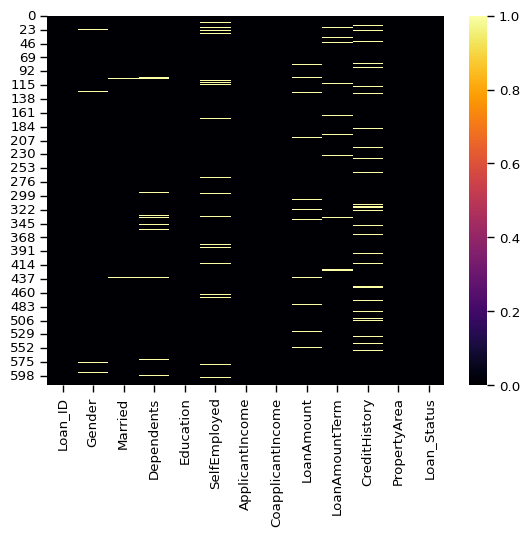

In [156]:
####################################################
display_colored_message("TOTAL OF NULL VALUES...")
# Calculate the total of null values
print(df.isnull().sum().sum())

display_colored_message("VISULIZE THE NULL VALUES USING HEATMAP...")
# Visulize the null values using heatmp
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=True, cmap='inferno')
plt.show()

In [158]:
####################################################
display_colored_message("DROP COLUMNS...")
# Drop columns
columns_to_drop = ['Loan_ID']
df.drop(columns_to_drop, axis=1, inplace=True)

In [159]:
####################################################
display_colored_message("FIND THE DUPLICATED ROWS...")
#Find the duplicated rows
print('Duplicated row sum : ', df.duplicated().sum())

display_colored_sub_message("\n>>>>>>>>>>>>>> To remove duplicated lines if they exist")
print("Calculate the percentage of duplicated rows")
# Calculate the percentage of duplicated rows
percent_duplication = df.duplicated().sum() / df.shape[0]
print(f"Percentage of duplicated rows: {percent_duplication * 100:.2f}%")

display_colored_sub_message("\n>>>>>>>>>>>>>> Check if there are any duplicated rows and if the percentage is less than 5%")
# Check if there are any duplicated rows and if the percentage is less than 5%
if 0 < percent_duplication < 0.05:
    display_colored_sub_message("\n>>>>>>>>>>>>>> Drop duplicated rows")
    # Drop duplicated rows
    df = df.drop_duplicates()
else:
    print("There are no duplicated rows or the percentage is 5% or higher")

# Optional: print the percentage of duplication
print(f"Percentage of duplicated rows: {percent_duplication * 100:.2f}%")

Duplicated row sum :  0

>>>>>>>>>>>>>> To remove duplicated lines if they exist
Calculate the percentage of duplicated rows
Percentage of duplicated rows: 0.00%

>>>>>>>>>>>>>> Check if there are any duplicated rows and if the percentage is less than 5%
There are no duplicated rows or the percentage is 5% or higher
Percentage of duplicated rows: 0.00%


In [160]:
####################################################
display_colored_message("FILL MISSING VALUES...")
#Missing Value
# Gender column
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
# Married column
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
# Dependents Column
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
# Self_Employed Column
df['SelfEmployed'].fillna('No',inplace=True)
# Credit_History Column
df['CreditHistory'] = df['CreditHistory'].fillna(df['CreditHistory'].mode()[0])
# LoanAmount Column
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
# Loan_Amount Column
df['LoanAmountTerm'] = df['LoanAmountTerm'].fillna(df['LoanAmountTerm'].mode()[0])
# PropertyArea Column
df['PropertyArea'] = df['PropertyArea'].fillna(df['PropertyArea'].mode()[0])


In [161]:
####################################################
display_colored_message("DEALING WITH CATEGORICAL VALUES...")
# Dealing with Categorical values

# Gender Column
#df['Gender'] =  df['Gender'].map({'Male':0,'Female':1})
le = LabelEncoder()
#df["Gender"] = le.fit_transform(df["Gender"])
#df["Married"] = le.fit_transform(df["Married"])
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])

print(colored(tabulate(df.head(2), headers='keys', tablefmt='fancy_grid'), 'cyan'))

╒════╤══════════╤═══════════╤══════════════╤═════════════╤════════════════╤═══════════════════╤═════════════════════╤══════════════╤══════════════════╤═════════════════╤════════════════╤═══════════════╕
│    │ Gender   │ Married   │   Dependents │ Education   │ SelfEmployed   │   ApplicantIncome │   CoapplicantIncome │   LoanAmount │   LoanAmountTerm │   CreditHistory │ PropertyArea   │   Loan_Status │
╞════╪══════════╪═══════════╪══════════════╪═════════════╪════════════════╪═══════════════════╪═════════════════════╪══════════════╪══════════════════╪═════════════════╪════════════════╪═══════════════╡
│  0 │ Male     │ No        │            0 │ Graduate    │ No             │              5849 │                   0 │          128 │              360 │               1 │ Urban          │             1 │
├────┼──────────┼───────────┼──────────────┼─────────────┼────────────────┼───────────────────┼─────────────────────┼──────────────┼──────────────────┼─────────────────┼────────────────┼──

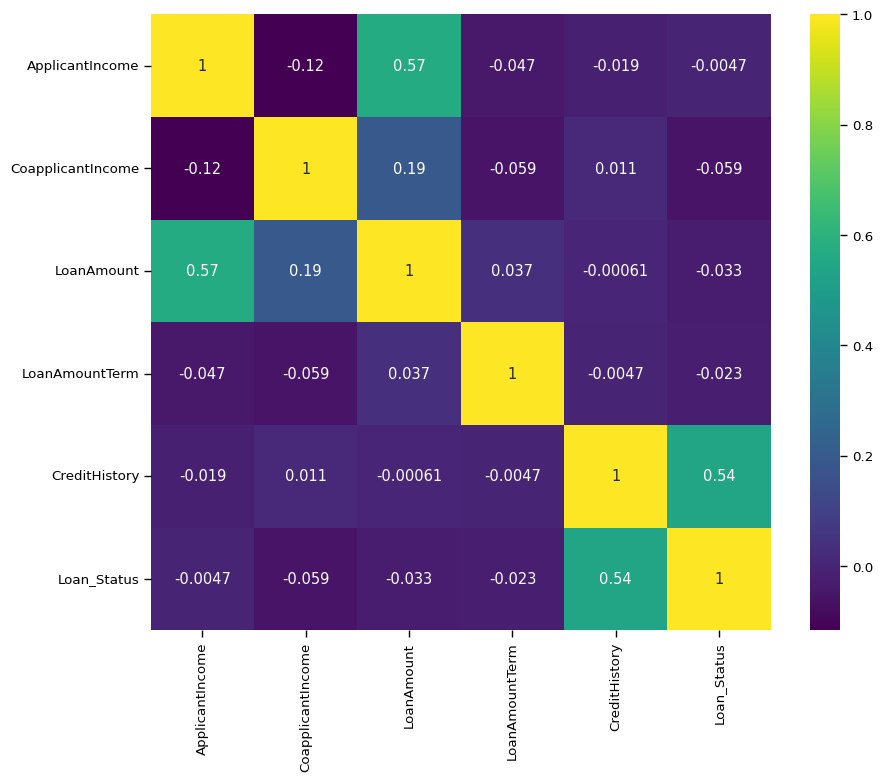

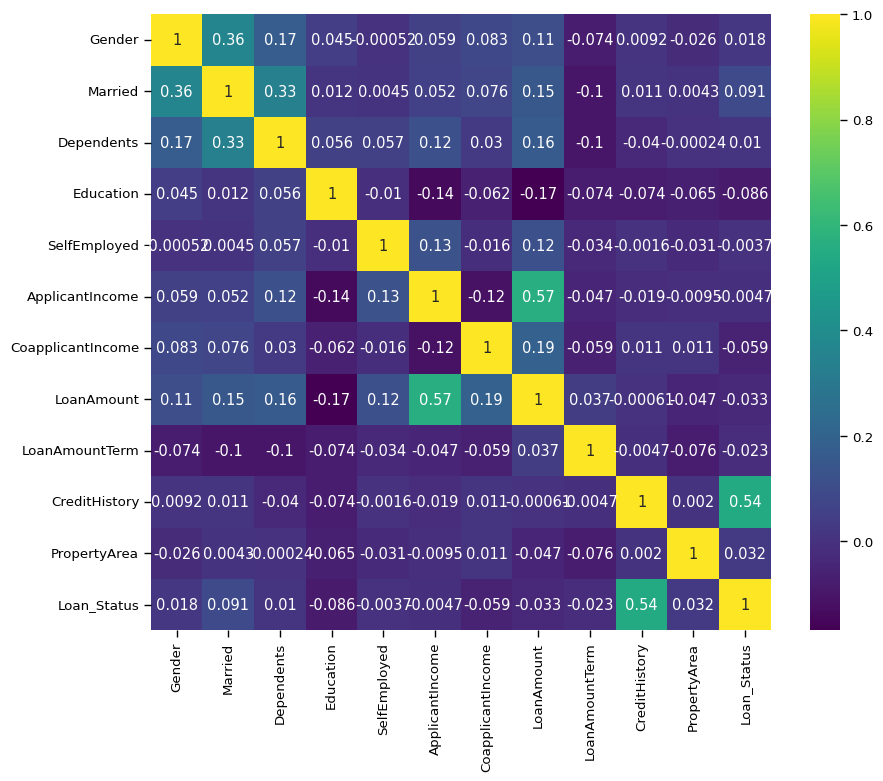

In [162]:
####################################################
display_colored_message("DISPLAY CORRELATION...")
dfCopy = df.copy()
# Filter columns with 'object' dtype
object_columns = dfCopy.select_dtypes(include=['object']).columns


plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="viridis")
plt.show()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to 'object' columns
for col in object_columns:
    dfCopy[col] = le.fit_transform(dfCopy[col])

plt.figure(figsize=(10,8))
sns.heatmap(dfCopy.corr(),annot=True,cmap="viridis")
plt.show()


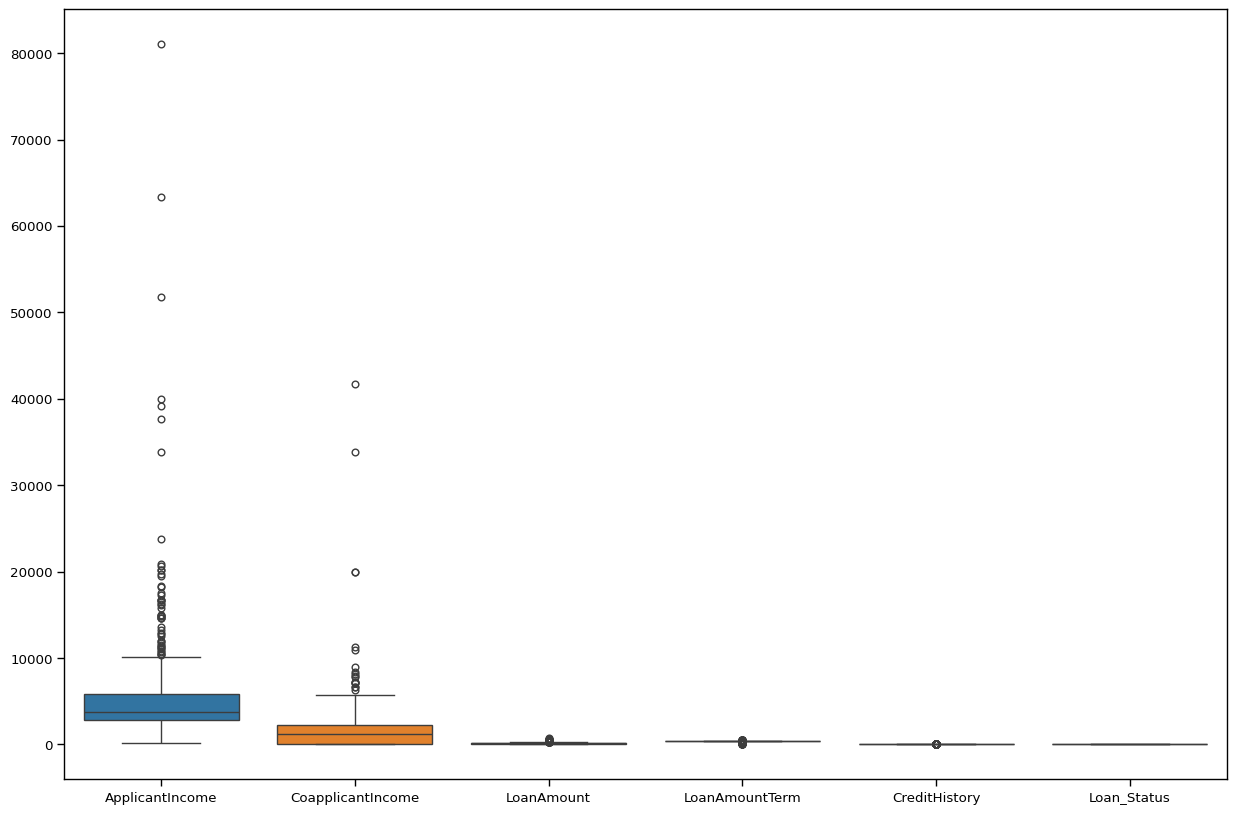

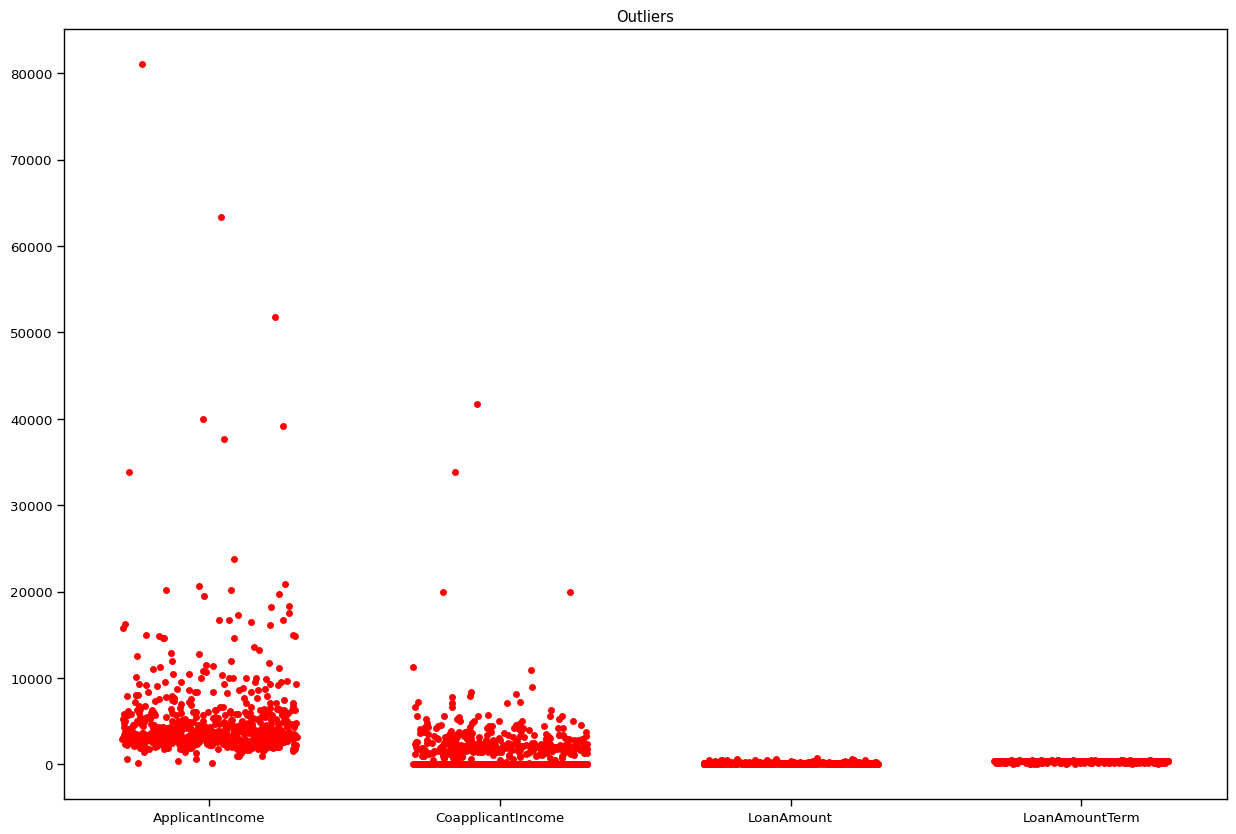

In [163]:

###################################################
display_colored_message("BOX PLOT DATASET...")
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.show()

display_colored_message("DISPLAY OUTLIERS...")
# Set the figure size
plt.figure(figsize=(15, 10))

# Only variables that have outliers
outliersColumns = df.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "LoanAmountTerm"])

# Add outliers to the plot
sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

# Set the axis labels and title
plt.title("Outliers")

# Show the plot
plt.show()




>>>>>>>>>>>>>> Q1, Q3, and IQR for dataset
Outliers lowerBound: 
 ApplicantIncome     -1498.750
CoapplicantIncome   -3445.875
dtype: float64
Outliers upperBound: 
 ApplicantIncome      10171.250
CoapplicantIncome     5743.125
dtype: float64

Sum of each outliers: 
 ApplicantIncome      50
CoapplicantIncome    18
dtype: int64

>>>>>>>>>>>>>> Calculate the number of unique rows containing outliers

Total number of unique rows with outliers: 
 66

>>>>>>>>>>>>>> Calculate the outliers percentage
Percentage of Outliers: 10.75%


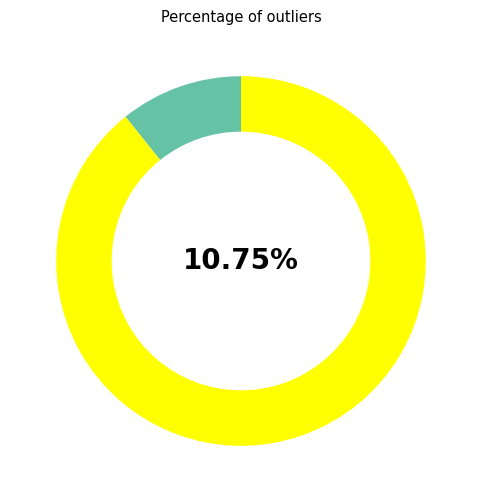


>>>>>>>>>>>>>> Check if there are any duplicated rows and if the percentage is less than 5%
We can not remove all outliers, percengtage is higer than 5%


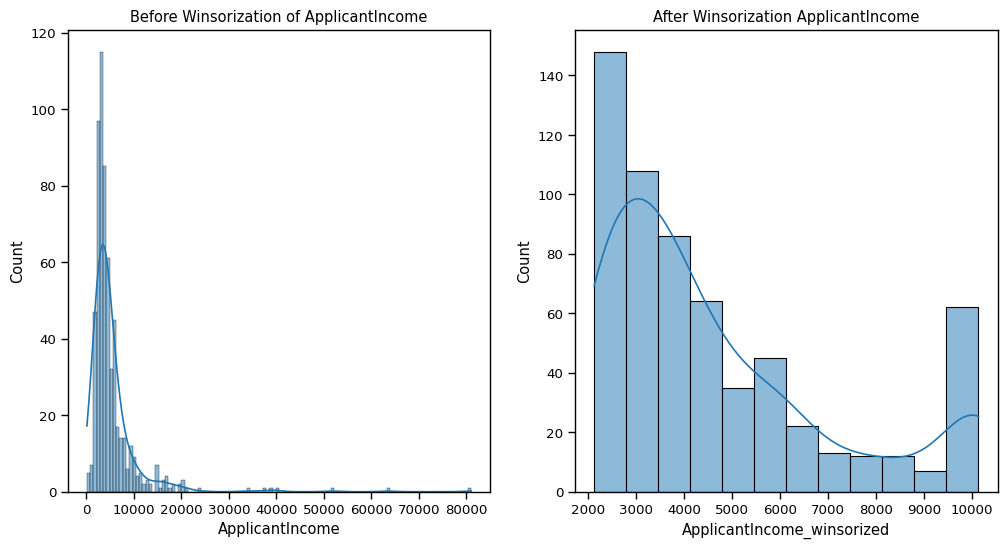

ApplicantIncome count < 10000 614
ApplicantIncome perc < 10000 0.0
CoapplicantIncome perc < 10000 0.0
CoapplicantIncome count < 10000 608


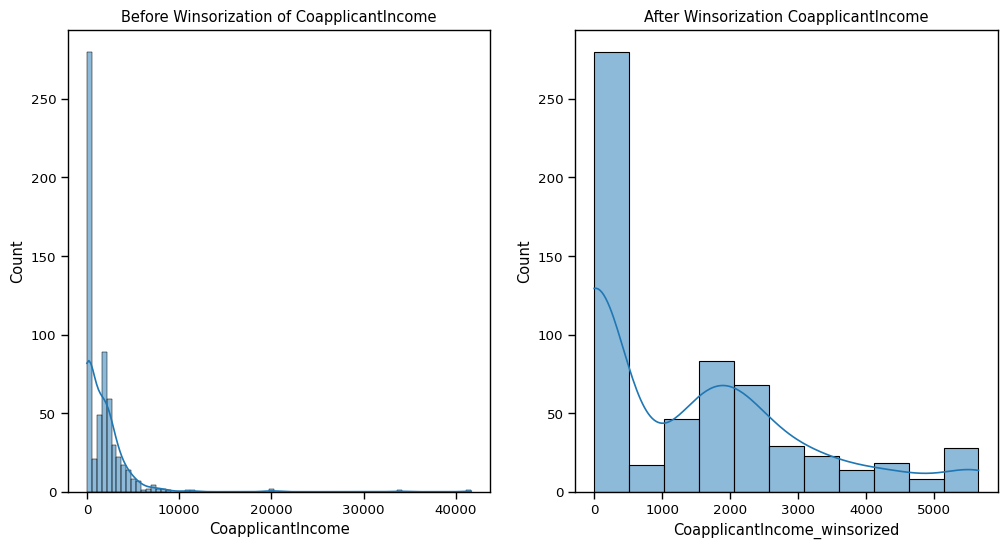


>>>>>>>>>>>>>> Q1, Q3, and IQR for dataset
Outliers --lowerBound: 
 ApplicantIncome     -1498.750
CoapplicantIncome   -3445.875
dtype: float64
Outliers --upperBound: 
 ApplicantIncome      10171.250
CoapplicantIncome     5743.125
dtype: float64

Sum of each outliers: 
 ApplicantIncome      0
CoapplicantIncome    0
dtype: int64

>>>>>>>>>>>>>> Calculate the number of unique rows containing outliers

Total number of unique rows with outliers---: 
 0

>>>>>>>>>>>>>> Calculate the outliers percentage
Percentage of outliers: 0.00%


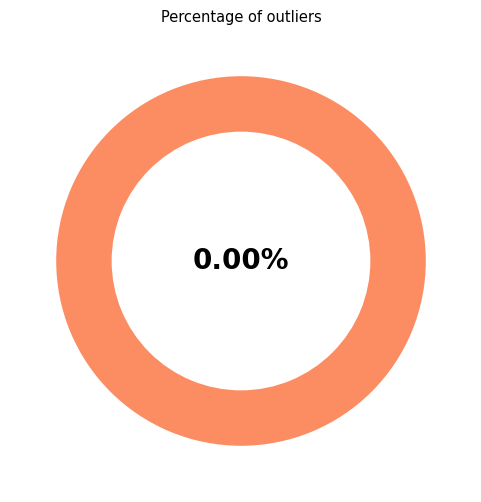


>>>>>>>>>>>>>> Check if there are any duplicated rows and if the percentage is less than 5%
We can not remove all outliers, percengtage is higer than 5%


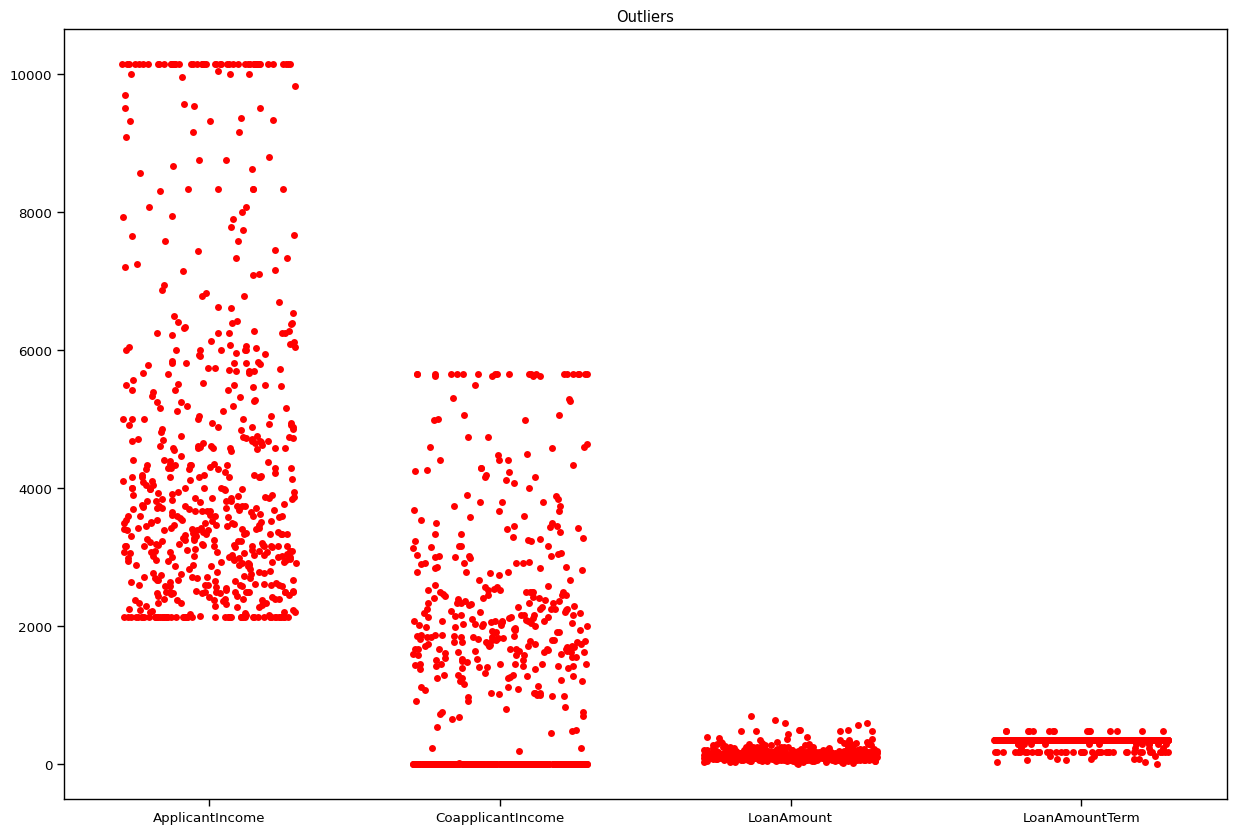

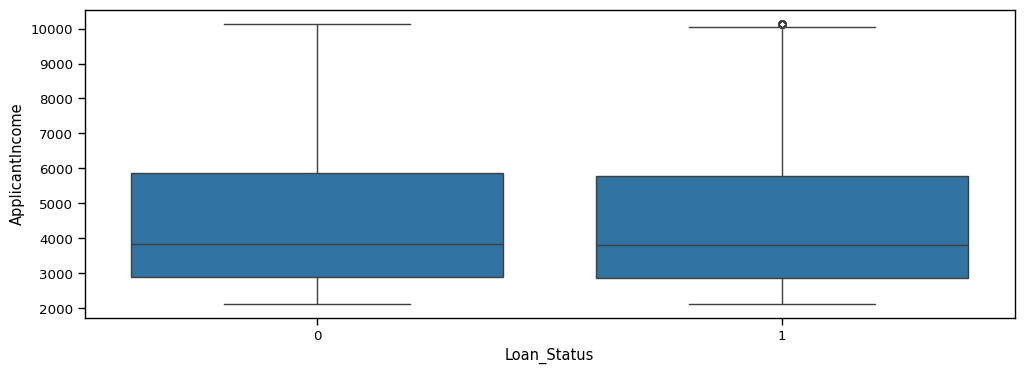

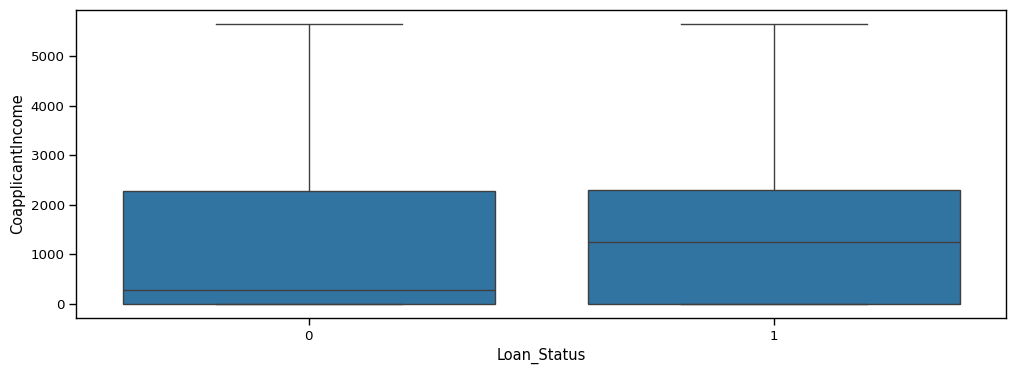

In [164]:
####################################################
display_colored_message("REMOVE OUTLIERS...")
display_colored_sub_message("\n>>>>>>>>>>>>>> Q1, Q3, and IQR for dataset")
dfOutliers = df[['ApplicantIncome', 'CoapplicantIncome']]
# Calculate Q1, Q3, and IQR
Q1 = dfOutliers.quantile(0.25)
Q3 = dfOutliers.quantile(0.75)
#Q1 = np.percentile(dfAge, 25, interpolation = 'midpoint')
#Q3 = np.percentile(dfAge, 75, interpolation = 'midpoint')

IQR = Q3 - Q1
# Define lower and upper bounds
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR
print("Outliers lowerBound: \n", lowerBound)
print("Outliers upperBound: \n", upperBound)
# Identify potential outliers
potentialOutliers = dfOutliers[(dfOutliers < lowerBound) | (dfOutliers > upperBound)]
potentialOutliersRowCount = potentialOutliers.notnull().sum()
print("\nSum of each outliers: \n", potentialOutliersRowCount)

display_colored_sub_message("\n>>>>>>>>>>>>>> Calculate the number of unique rows containing outliers")
# Get unique rows containing outliers
uniqueOutlierRows = potentialOutliers.any(axis=1)
dfUniqueOutliers = df[uniqueOutlierRows]
# Count the total number of unique rows with outliers
totalUniqueOutliers = dfUniqueOutliers.shape[0]
print("\nTotal number of unique rows with outliers: \n", totalUniqueOutliers)

display_colored_sub_message("\n>>>>>>>>>>>>>> Calculate the outliers percentage")
# Calculate the outliers percentag
percentOutliers = totalUniqueOutliers / df.shape[0]
print(f"Percentage of Outliers: {percentOutliers * 100:.2f}%")


# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

# Data to plot
sizes = [percentOutliers * 100, 100 - (percentOutliers * 100)]  # Scale to 100%
colors = ['#66c2a5', 'Yellow']  # Custom colors

# Create a pie chart
wedges, texts = ax.pie(sizes, colors=colors, startangle=90, wedgeprops=dict(width=0.3))

# Draw text in the center of the plot
plt.text(0, 0, f'{percentOutliers * 100:.2f}%', horizontalalignment='center', verticalalignment='center', fontsize=20, weight='bold')

# Add title
plt.title('Percentage of outliers')

# Show the plot
plt.show()

display_colored_sub_message("\n>>>>>>>>>>>>>> Check if there are any duplicated rows and if the percentage is less than 5%")
# Check if there are any duplicated rows and if the percentage is less than 5%
if 0 < percentOutliers < 0.05:
    display_colored_sub_message("\n>>>>>>>>>>>>>> Remove outliers")
else:
    print("We can not remove all outliers, percengtage is higer than 5%")

dfWinsorized = df.copy()

 # Winsorize the column 'ApplicantIncome', ApplicantIncome is the column with potential outliers,  2/1030
dfWinsorized['ApplicantIncome_winsorized'] = winsorize(dfWinsorized['ApplicantIncome'], limits=(0.083, 0.083))
#dfWinsorized['ApplicantIncome_winsorized'] = winsorize(dfWinsorized['ApplicantIncome'], limits=(0.014, 0.014))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Before Winsorization of ApplicantIncome')
plt.subplot(1, 2, 2)
sns.histplot(dfWinsorized['ApplicantIncome_winsorized'], kde=True)
plt.title('After Winsorization ApplicantIncome')
plt.show()
#Replace orginal value
df['ApplicantIncome'] = dfWinsorized['ApplicantIncome_winsorized']

count = df[df['ApplicantIncome'] < 20000].shape[0]
percentilleApplicantIncome = (df.shape[0] - count) / df.shape[0] / 100
print('ApplicantIncome count < 10000' , count)
print('ApplicantIncome perc < 10000' , percentilleApplicantIncome)

count = df[df['CoapplicantIncome'] < 10000].shape[0]
percentilleCoapplicantIncome= (df.shape[0] - count) / df.shape[0]
print('CoapplicantIncome perc < 10000' , percentilleApplicantIncome)
print('CoapplicantIncome count < 10000' , count)

 # Winsorize the column 'CoapplicantIncome', CoapplicantIncome is the column with potential outliers
dfWinsorized['CoapplicantIncome_winsorized'] = winsorize(dfWinsorized['CoapplicantIncome'], limits=(0.031, 0.031))
#dfWinsorized['CoapplicantIncome_winsorized'] = winsorize(dfWinsorized['CoapplicantIncome'], limits=(0.01, 0.01))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['CoapplicantIncome'], kde=True)
plt.title('Before Winsorization of CoapplicantIncome')
plt.subplot(1, 2, 2)
sns.histplot(dfWinsorized['CoapplicantIncome_winsorized'], kde=True)
plt.title('After Winsorization CoapplicantIncome')
plt.show()
#Replace orginal value
df['CoapplicantIncome'] = dfWinsorized['CoapplicantIncome_winsorized']


display_colored_sub_message("\n>>>>>>>>>>>>>> Q1, Q3, and IQR for dataset")
dfOutliers = df[['ApplicantIncome', 'CoapplicantIncome']]
# Calculate Q1, Q3, and IQR
Q1 = dfOutliers.quantile(0.25)
Q3 = dfOutliers.quantile(0.75)
#Q1 = np.percentile(dfAge, 25, interpolation = 'midpoint')
#Q3 = np.percentile(dfAge, 75, interpolation = 'midpoint')

IQR = Q3 - Q1
# Define lower and upper bounds
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR
print("Outliers --lowerBound: \n", lowerBound)
print("Outliers --upperBound: \n", upperBound)
# Identify potential outliers
potentialOutliers = dfOutliers[(dfOutliers < lowerBound) | (dfOutliers > upperBound)]
potentialOutliersRowCount = potentialOutliers.notnull().sum()
print("\nSum of each outliers: \n", potentialOutliersRowCount)

display_colored_sub_message("\n>>>>>>>>>>>>>> Calculate the number of unique rows containing outliers")
# Get unique rows containing outliers
uniqueOutlierRows = potentialOutliers.any(axis=1)
dfUniqueOutliers = df[uniqueOutlierRows]
# Count the total number of unique rows with outliers
totalUniqueOutliers = dfUniqueOutliers.shape[0]
print("\nTotal number of unique rows with outliers---: \n", totalUniqueOutliers)

####################################################
display_colored_sub_message("\n>>>>>>>>>>>>>> Calculate the outliers percentage")
# Calculate the outliers percentag
percentOutliers = totalUniqueOutliers / df.shape[0]
print(f"Percentage of outliers: {percentOutliers * 100:.2f}%")


# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

# Data to plot
sizes = [percentOutliers * 100, 100 - (percentOutliers * 100)]  # Scale to 100%
colors = ['#66c2a5', '#fc8d62']  # Custom colors

# Create a pie chart
wedges, texts = ax.pie(sizes, colors=colors, startangle=90, wedgeprops=dict(width=0.3))

# Draw text in the center of the plot
plt.text(0, 0, f'{percentOutliers * 100:.2f}%', horizontalalignment='center', verticalalignment='center', fontsize=20, weight='bold')

# Add title
plt.title('Percentage of outliers')

# Show the plot
plt.show()


display_colored_sub_message("\n>>>>>>>>>>>>>> Check if there are any duplicated rows and if the percentage is less than 5%")
# Check if there are any duplicated rows and if the percentage is less than 5%
if 0 < percentOutliers < 0.05:
    display_colored_sub_message("\n>>>>>>>>>>>>>> Remove outliers")
else:
    print("We can not remove all outliers, percengtage is higer than 5%")

####################################################
#After outlier
# Set the figure size
plt.figure(figsize=(15, 10))

# Only variables that have outliers
outliersColumns = df.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "LoanAmountTerm"])

# Add outliers to the plot
sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

# Set the axis labels and title
plt.title("Outliers")

# Show the plot
plt.show()


####################################################
# plotting boxplot
plt.figure(figsize=(12,4))
sns.boxplot(x='Loan_Status',y = 'ApplicantIncome', data=df)
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(x='Loan_Status',y = 'CoapplicantIncome', data=df)
plt.show()


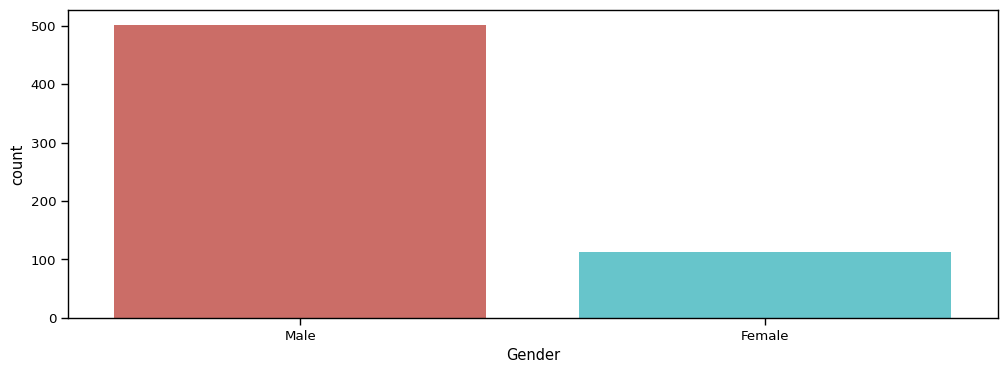

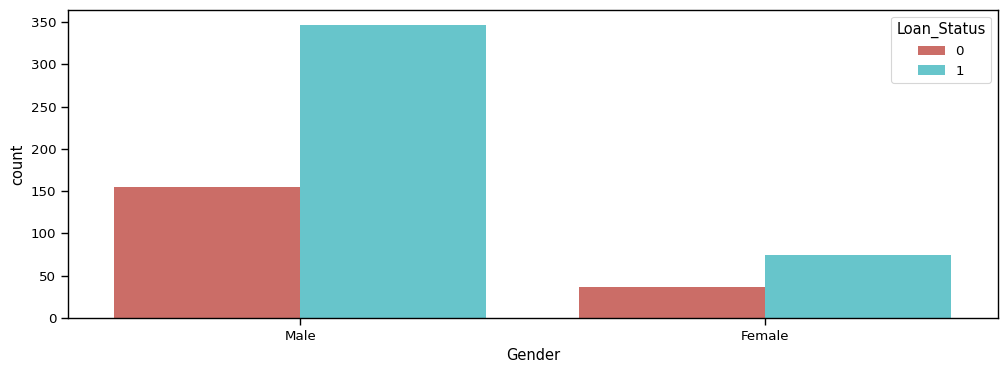

<Figure size 1500x600 with 0 Axes>

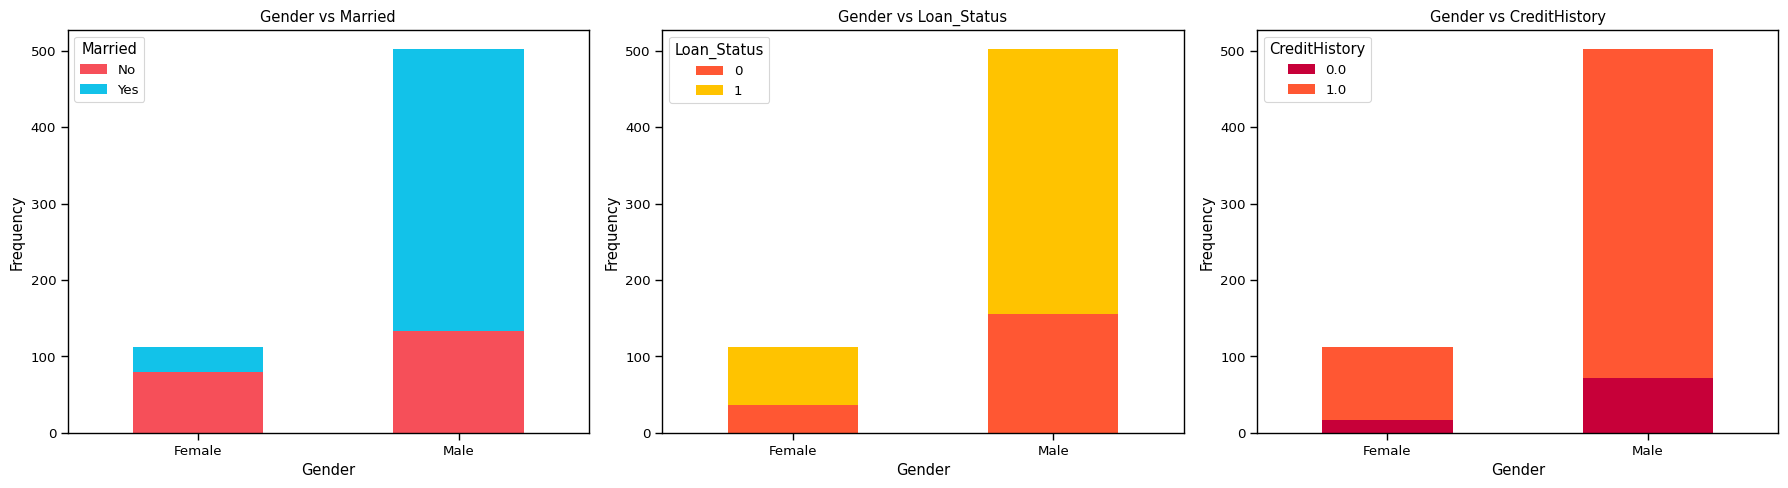

In [165]:
####################################################
display_colored_message("DATA VISULAZATION...")

# Counting the accurance of each value in Gender column
df['Gender'].value_counts()

plt.figure(figsize=(12, 4))
sns.countplot(x='Gender', data=df, palette='hls')
plt.show()

# comparing loan status with gender column
plt.figure(figsize=(12,4))
sns.countplot(x = 'Gender',hue ='Loan_Status', data=df , palette='hls')
plt.show()

#Married people collect more loan than unmarried
#Counting the occurence of each value with Loan_amount_term column
df['LoanAmountTerm'].value_counts()
plt.figure(figsize=(15,6))
#sns.countplot('Loan_Amount_Term', data = df, palette='hls')
#plt.xticks(rotation = 90)
#plt.show()

# Creating cross-tabulations
crosstab1 = pd.crosstab(df.Gender, df.Married)
crosstab2 = pd.crosstab(df.Gender, df.Loan_Status)
crosstab3 = pd.crosstab(df.Gender, df.CreditHistory)

# Plotting the cross-tabulations in subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gender vs Married
crosstab1.plot(kind="bar", stacked=True, ax=axes[0], color=['#f64f59', '#12c2e9'])
axes[0].set_title('Gender vs Married')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Gender vs Loan_Status
crosstab2.plot(kind="bar", stacked=True, ax=axes[1], color=['#FF5733', '#FFC300'])
axes[1].set_title('Gender vs Loan_Status')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Frequency')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

# Gender vs LoanAmount
# For CreditHistory, we will use a different kind of plot since it's continuous data.
crosstab3.plot(kind="bar", stacked=True, ax=axes[2], color=['#C70039', '#FF5733'])
axes[2].set_title('Gender vs CreditHistory')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Frequency')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()



In [166]:

####################################################
display_colored_message("#D SCATTER PLOT OF LOAN DATA...")

plt.figure(figsize=(15, 10))
fig = px.scatter_3d(df,
                    x='ApplicantIncome',
                    y='CoapplicantIncome',
                    z='LoanAmount',
                    color='Loan_Status',
                    size='CreditHistory',
                    size_max=18,
                    symbol='Gender',
                    opacity=0.7,
                    title='3D Scatter Plot of Loan Data',
                    labels={
                        'ApplicantIncome': 'Applicant Income',
                        'CoapplicantIncome': 'Coapplicant Income',
                        'LoanAmount': 'Loan Amount',
                        'Loan_Status': 'Loan Status',
                        'CreditHistory': 'Credit History',
                        'Gender': 'Gender'
                    })

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(
                      xaxis_title='Applicant Income',
                      yaxis_title='Coapplicant Income',
                      zaxis_title='Loan Amount',
                  ))

fig.show()


display_colored_message("#D SCATTER PLOT OF LOAN DATA BY LOAN STATUS AND GENDER...")

plt.figure(figsize=(15, 10))
fig = px.scatter_3d(df,
                    x='LoanAmount',
                    y='ApplicantIncome',
                    z='LoanAmountTerm',
                    color='Loan_Status',
                    size='CreditHistory',
                    size_max=18,
                    symbol='Gender',
                    opacity=0.7,
                    title='3D Scatter Plot of Loan Data by Loan Status and Gender',
                    labels={
                        'LoanAmount': 'Loan Amount',
                        'ApplicantIncome': 'Applicant Income',
                        'LoanAmountTerm': 'Loan Term',
                        'LoanStatus': 'Loan Status',
                        'CreditHistory': 'Credit History',
                        'Gender': 'Gender'
                    })

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(
                      xaxis_title='Loan Amount',
                      yaxis_title='Applicant Income',
                      zaxis_title='Loan Term',
                  ))

fig.show()

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

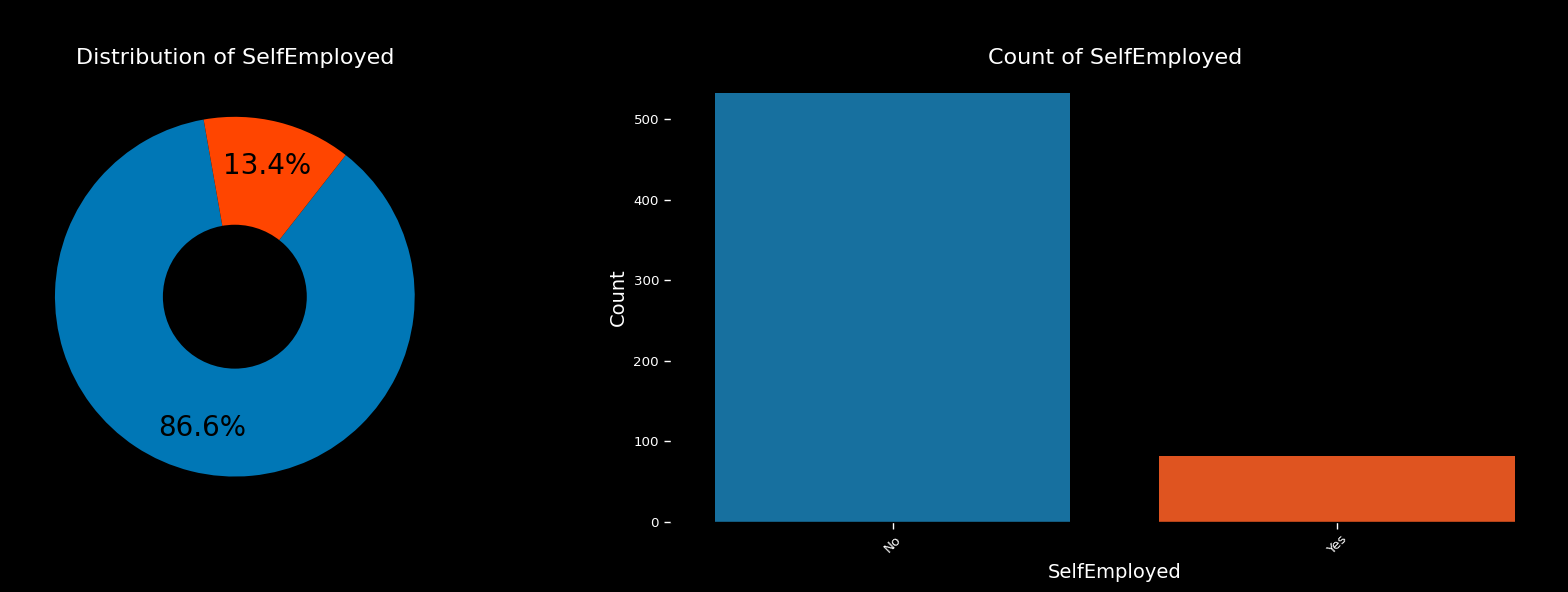

In [167]:
####################################################
display_colored_message("PLOT DISTRIBUTION OF SELFEMPLOYED...")
def single_plot_distribution(column_name, dataframe, title):

    # Get the value counts of the specified column
    value_counts = dataframe[column_name].value_counts()

    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), facecolor='black')

    # Set main title for the figure
    fig.suptitle(title)

    # Pie chart
    #pie_colors = ['#0077b6', '#00b4d8', '#90e0ef', '#caf0f8']
    pie_colors = ['#0077b6', '#ff4500', '#90e0ef', '#caf0f8']
    ax1.pie(value_counts, autopct='%0.001f%%', startangle=100, textprops={'fontsize': 20}, pctdistance=0.75, colors=pie_colors, labels=None)
    centre_circle = plt.Circle((0,0),0.40,fc='black')
    ax1.add_artist(centre_circle)
    ax1.set_title(f'Distribution of {column_name}', fontsize=16, color='white')

    # Bar chart
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax2, palette=pie_colors)
    ax2.set_title(f'Count of {column_name}', fontsize=16, color='white')
    ax2.set_xlabel(column_name, fontsize=14, color='white')
    ax2.set_ylabel('Count', fontsize=14, color='white')

    # Rotate x-axis labels for better readability
    ax2.tick_params(axis='x', rotation=45, colors='white')
    ax2.tick_params(axis='y', colors='white')

    # Set background color for the subplots
    ax1.set_facecolor('black')
    ax2.set_facecolor('black')

    # Show the plots
    plt.tight_layout()
    plt.show()


# Plot the distribution of SelfEmployed in the dataset
single_plot_distribution('SelfEmployed', df, 'SelfEmployed Distribution')

In [168]:

####################################################
display_colored_message("\nGROUP BY GENDER AND CALCULATE MEAN LOAN AMOUNT...")
print("\n")
# Group the DataFrame by 'Gender' and calculate the mean of 'LoanAmount'
np = round(df.groupby('Gender')['LoanAmount'].mean().round(1))


def bar_charts(x, y, title):

    # Create a bar chart using Plotly Express
    fig = px.bar(
        x=x,  # Data for the x-axis
        y=y,  # Data for the y-axis
        title=title,  # Title of the chart
        color=y,  # Color the bars based on y-values
        labels={'x': 'Gender', 'y': 'Average LoanAmount'},  # Custom axis labels
        text=y  # Add text labels to the bars
    )

    # Customize the layout
    fig.update_layout(
        paper_bgcolor='#111',  # Set the background color of the entire plot
        plot_bgcolor='#111',   # Set the background color of the plot area
        font_color='white',     # Set the font color
        font=dict(size=20)     # Set the font size
    ),
    fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showticklabels=True,
        ticks='outside',
        tickfont=dict(
            size=15,
            family='Ariel',
            color='white'
        ),
        showline=True,
        linewidth=5,
        linecolor='rgb(204, 204, 204)'
    ),
    yaxis=dict(
        showgrid=False,
        showticklabels=True,
        ticks='outside',
        tickfont=dict(
            size=15,
            family='Ariel',
            color='white'
        ),
        showline=True,
        linewidth=5,
        linecolor='rgb(204, 204, 204)'
    ),
    title=dict(
        text=title,
        font=dict(
            size=30,
            family='Ariel'
        )
    ),
    showlegend=True
    )
    fig.show()

# Call the bar_charts function to generate a bar chart
bar_charts(
    np.index,           # Data for the x-axis (gender)
    np.values,          # Data for the y-axis (average loan Amount)
    'Average Loan Amount by Gender'  # Title of the chart
)

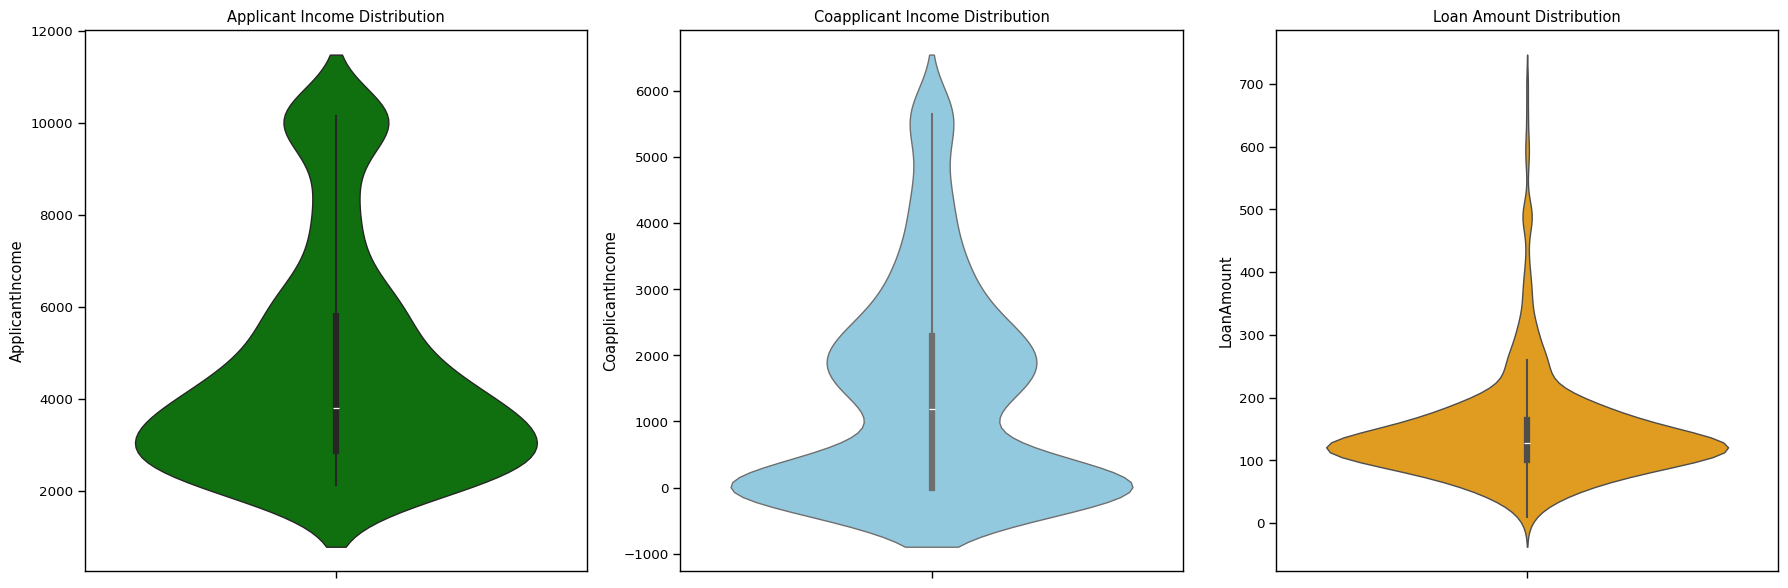

In [169]:
####################################################
display_colored_message("\nLOAN AMOUNT DISTRIBUTION...")
fig, axs1 = plt.subplots(1, 3, figsize=(18, 6))

# Create violin plots for ApplicantIncome, CoapplicantIncome, and LoanAmount
sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0], color='green')
axs1[0].set_title('Applicant Income Distribution')

sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[1], color='skyblue')
axs1[1].set_title('Coapplicant Income Distribution')

sns.violinplot(data=df, y="LoanAmount", ax=axs1[2], color='orange')
axs1[2].set_title('Loan Amount Distribution')

# Adjust layout
plt.tight_layout()
plt.show()



In [170]:
####################################################
display_colored_message("\nPIE VISULAZATION...")

#DATA visulazation
d_labels = ['Male', 'Female']
g_labels = ['Graduate', 'Not Graduate']
l_labels = ['YES', 'NO']
p_labels = ['Semiurban', 'Urban', 'Rural']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=4, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=d_labels, values=df['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=g_labels, values=df['Education'].value_counts(), name="Education"),
              1, 2)
fig.add_trace(go.Pie(labels=p_labels, values=df['PropertyArea'].value_counts(), name="PropertyArea"),
              1, 3)
fig.add_trace(go.Pie(labels=l_labels, values=df['Loan_Status'].value_counts(), name="Loan_Status"),
              1, 4)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender Education and Loan Status Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.1, y=0.3, font_size=20, showarrow=False),
                 dict(text='Education', x=0.3, y=0.6, font_size=20, showarrow=False),
                 dict(text='PropertyArea', x=0.6, y=0.9, font_size=20, showarrow=False),
                 dict(text='Loan Status', x=0.9, y=0.5, font_size=20, showarrow=False)])
fig.show()

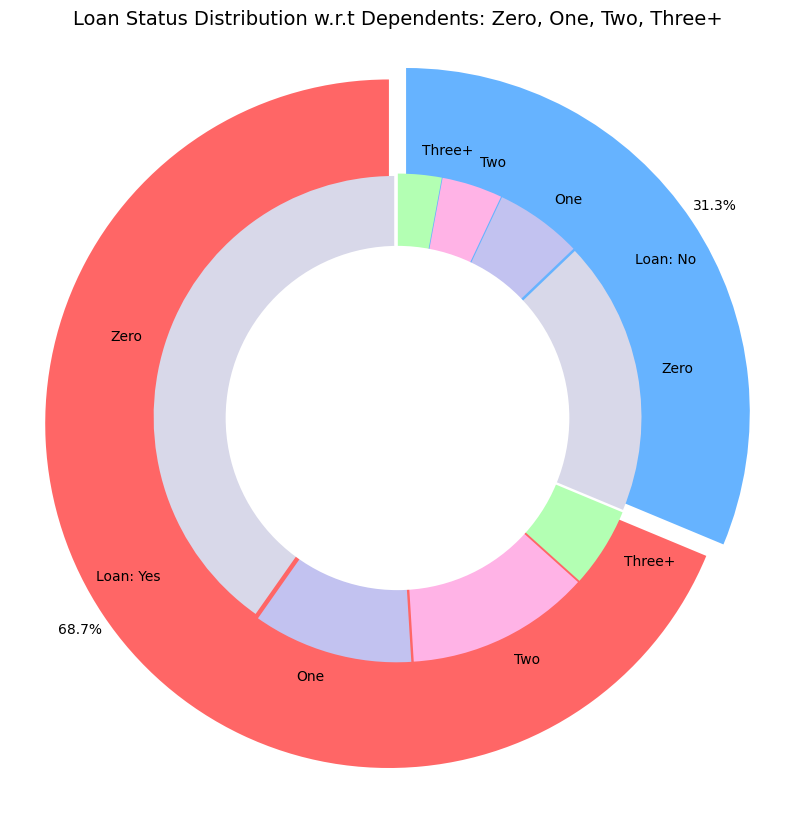

In [171]:
####################################################
# Find the most repeated Dependents value for each Loan_Status
mode_dependents = df.groupby('Loan_Status')['Dependents'].apply(lambda x: x.mode().iloc[0]).to_dict()

# Replace None values in Dependents column based on Loan_Status
for index, row in df.iterrows():
    if pd.isnull(row['Dependents']):
        df.at[index, 'Dependents'] = mode_dependents[row['Loan_Status']]

# Group by dependents the employees who got a loan
loan_yes_counts = df[df["Loan_Status"] == 1].groupby("Dependents").size().tolist()

# Group by dependents the employees who didn't get a loan
loan_no_counts = df[df["Loan_Status"] == 0].groupby("Dependents").size().tolist()


# Group by dependents the employees who got a loan
loan_yes_counts = df[df["Loan_Status"] == 1].groupby("Dependents").size()

# Group by dependents the employees who didn't get a loan
loan_no_counts = df[df["Loan_Status"] == 0].groupby("Dependents").size()

# Data for the outer pie chart (distribution of loan status by dependents)
labels_dependents = ["Zero", "One", "Two", "Three+", "Zero", "One", "Two", "Three+"]
sizes_dependents = [
    loan_yes_counts.get('0', 0), loan_yes_counts.get('1', 0), loan_yes_counts.get('2', 0), loan_yes_counts.get('3+', 0),
    loan_no_counts.get('0', 0), loan_no_counts.get('1', 0), loan_no_counts.get('2', 0), loan_no_counts.get('3+', 0)
]

labels_loan =["Loan: Yes", "Loan: No"]
values_loan = [sum(loan_yes_counts), sum(loan_no_counts)]

# Colors
colors_loan = ['#ff6666', '#66b3ff']
colors_dependents = ['#d8d8e9', '#c2c2f0', '#ffb3e6', '#b3ffb3', '#d8d8e9', '#c2c2f0', '#ffb3e6', '#b3ffb3']

# Explode
explode = (0.3,0.3)
explode_dependents = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

# Plot
plt.figure(figsize=(10, 10))
textprops = {"fontsize":10}

#Plot
plt.pie(values_loan, labels=labels_loan,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors_loan, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_dependents,labels=labels_dependents,colors=colors_dependents,startangle=90, explode=explode_dependents,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set equal aspect ratio
plt.axis('equal')

plt.title('Loan Status Distribution w.r.t Dependents: Zero, One, Two, Three+', fontsize=14, y=1)
plt.show()

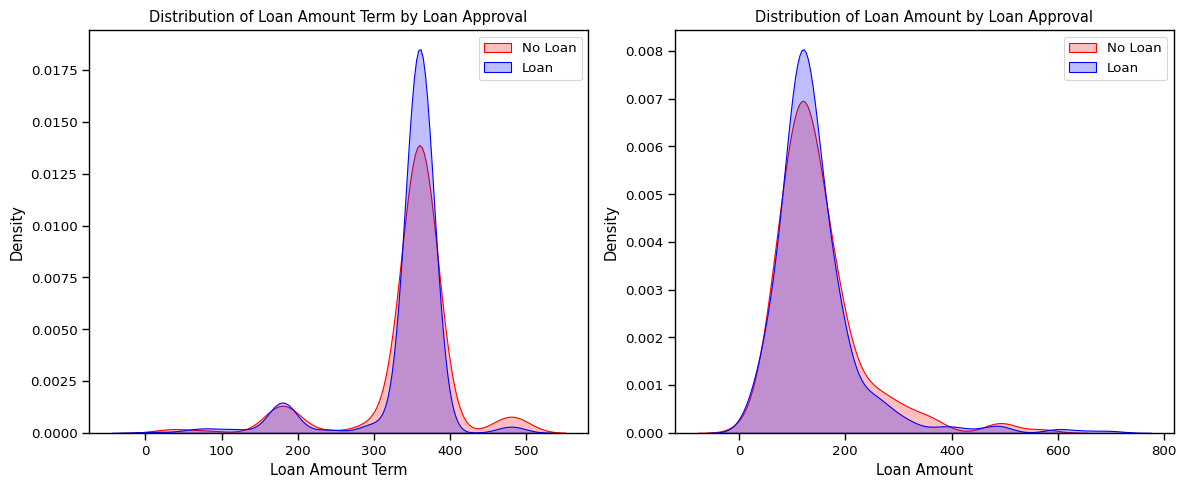

In [172]:
####################################################
# Set the style and context for seaborn
sns.set_context("paper", font_scale=1.1)

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Distribution of Loan Amount Term by Loan Approval
sns.kdeplot(df.LoanAmountTerm[df["Loan_Status"] == 0], color="Red", shade=True, ax=axes[0])
sns.kdeplot(df.LoanAmountTerm[df["Loan_Status"] == 1], color="Blue", shade=True, ax=axes[0])
axes[0].legend(["No Loan", "Loan"], loc='upper right')
axes[0].set_ylabel('Density')
axes[0].set_xlabel('Loan Amount Term')
axes[0].set_title('Distribution of Loan Amount Term by Loan Approval')

# Plot 2: Distribution of Loan Amount by Loan Approval
sns.kdeplot(df.LoanAmount[df["Loan_Status"] == 0], color="Red", shade=True, ax=axes[1])
sns.kdeplot(df.LoanAmount[df["Loan_Status"] == 1], color="Blue", shade=True, ax=axes[1])
axes[1].legend(["No Loan", "Loan"], loc='upper right')
axes[1].set_ylabel('Density')
axes[1].set_xlabel('Loan Amount')
axes[1].set_title('Distribution of Loan Amount by Loan Approval')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

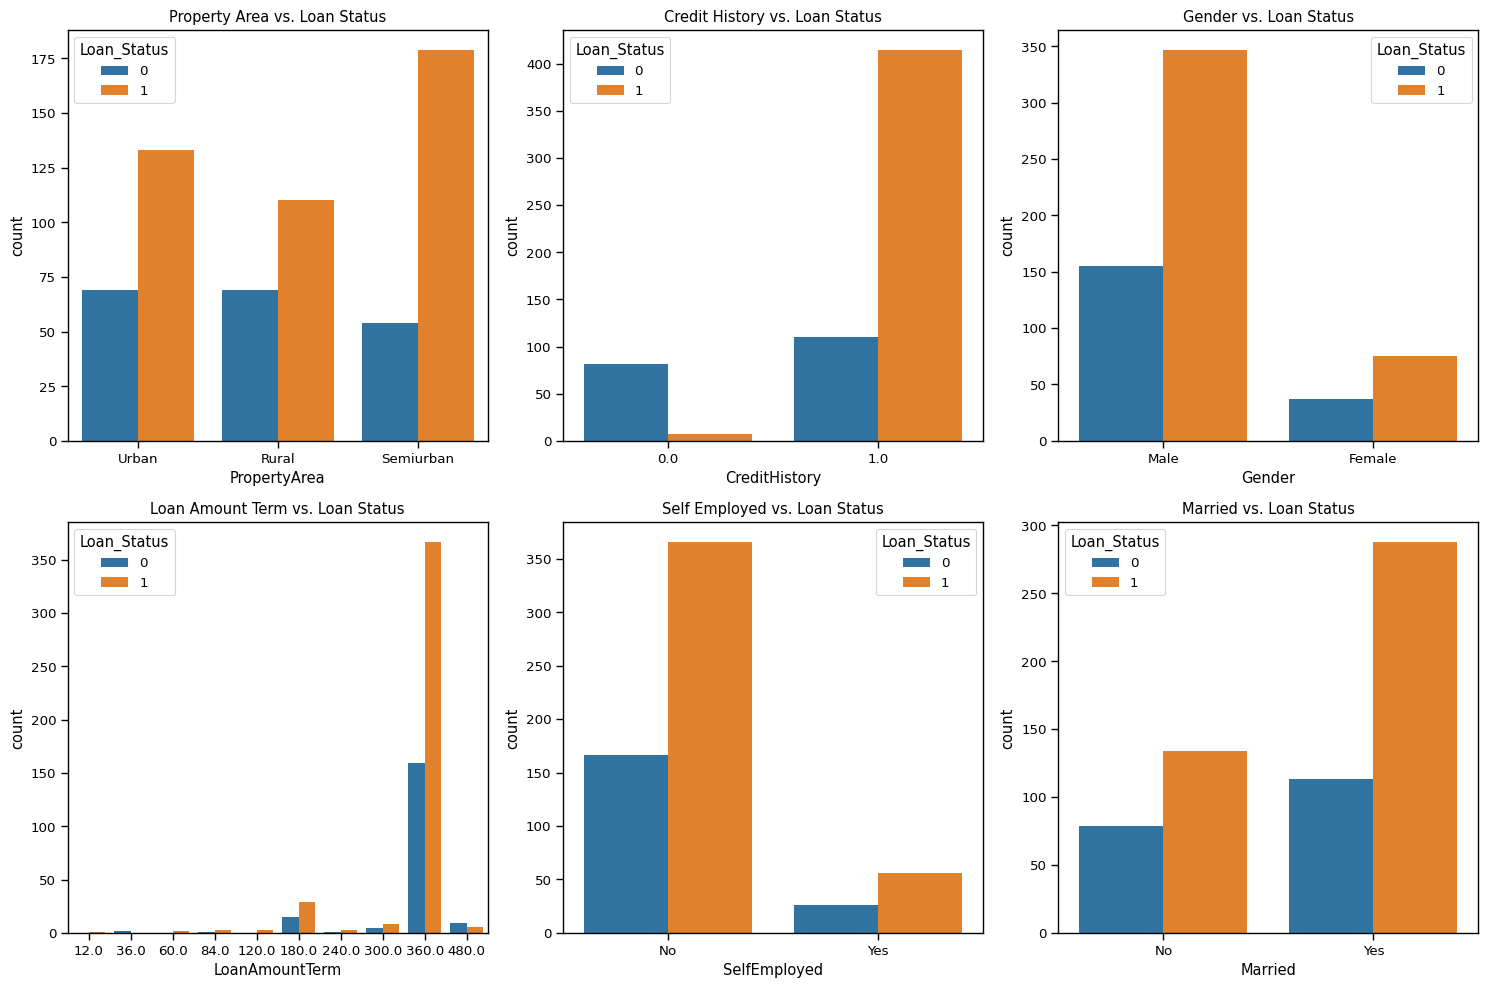

In [173]:
####################################################
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot 1: Property Area vs. Loan Status
sns.countplot(x='PropertyArea', hue='Loan_Status', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Property Area vs. Loan Status')

# Plot 2: Credit History vs. Loan Status
sns.countplot(x='CreditHistory', hue='Loan_Status', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Credit History vs. Loan Status')

# Plot 3: Gender vs. Loan Status
sns.countplot(x='Gender', hue='Loan_Status', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Gender vs. Loan Status')

# Plot 4: Loan Amount Term vs. Loan Status
sns.countplot(x='LoanAmountTerm', hue='Loan_Status', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Loan Amount Term vs. Loan Status')

# Plot 5: Self Employed vs. Loan Status
sns.countplot(x='SelfEmployed', hue='Loan_Status', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Self Employed vs. Loan Status')

# Plot 6: Married vs. Loan Status
sns.countplot(x='Married', hue='Loan_Status', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Married vs. Loan Status')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


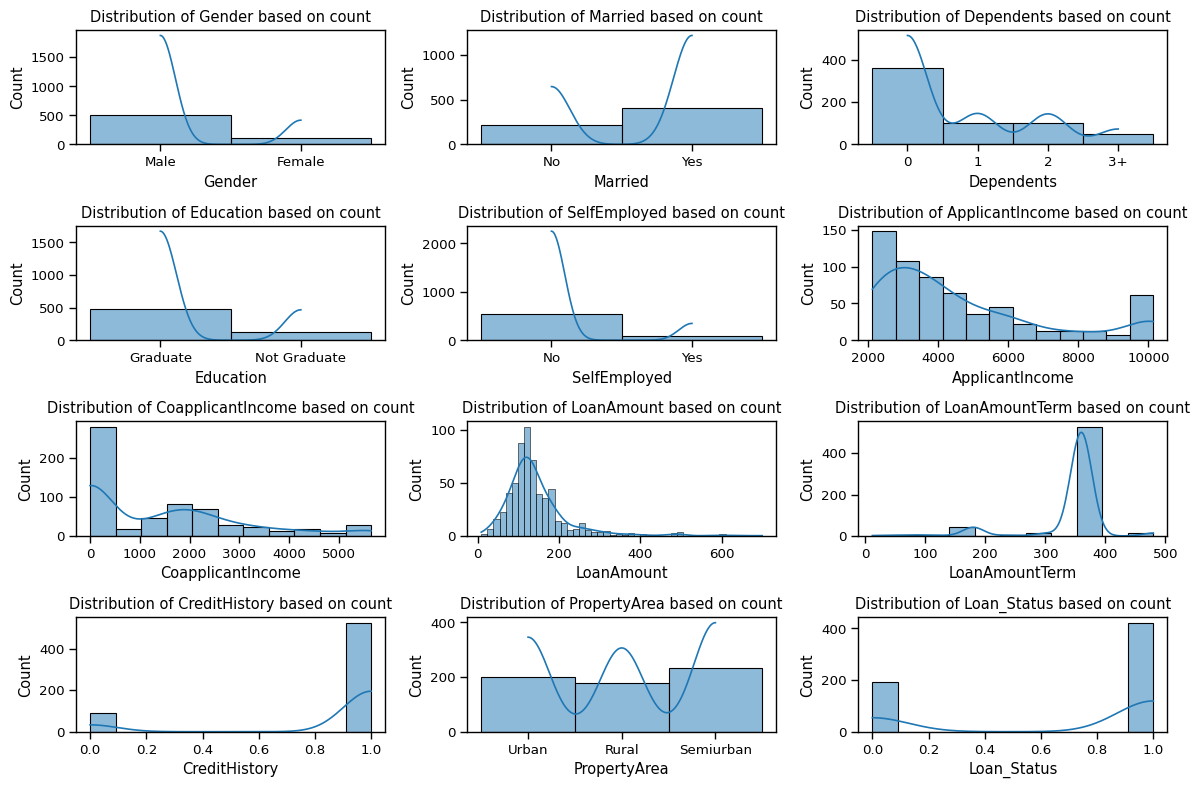

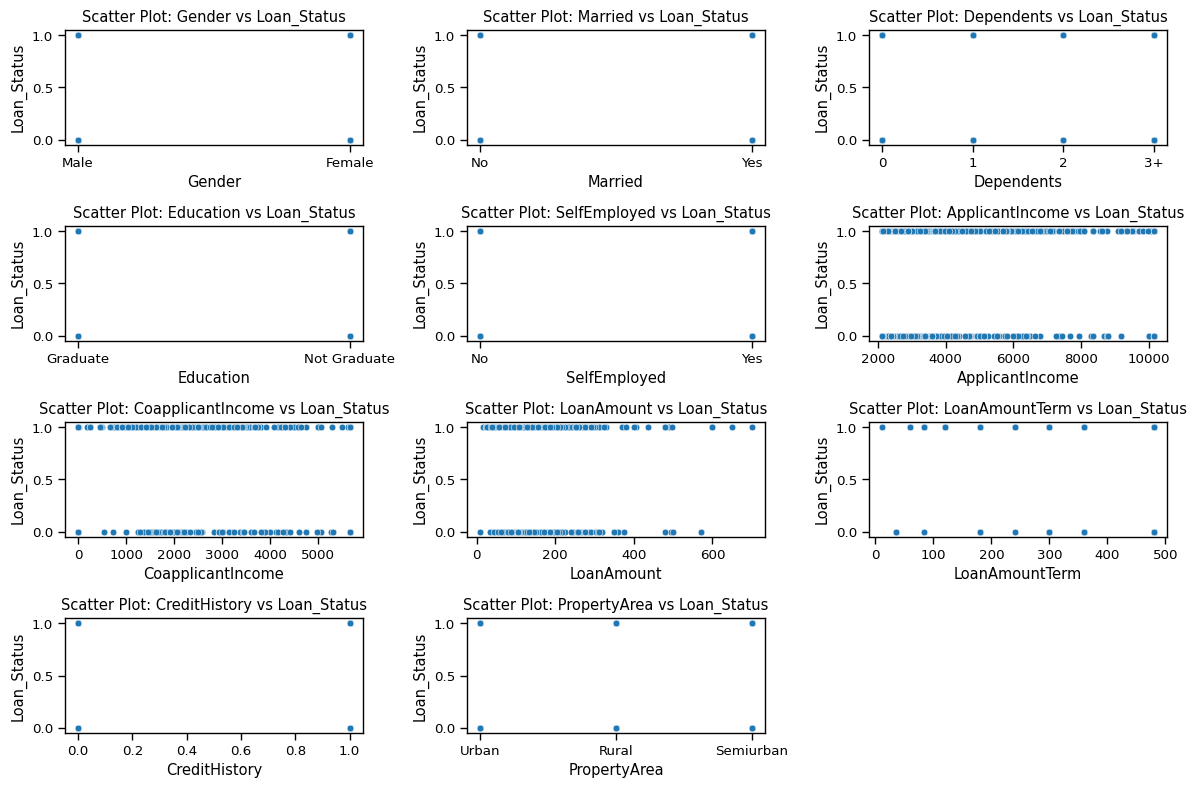

In [174]:
####################################################
num_cols = 3
num_rows = (len(df.columns) + num_cols - 1) // num_cols

# Create a figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes if needed
axes = axes.flatten()

# Loop through each column and plot the distribution
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} based on count')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes if needed
axes = axes.flatten()

# Iterate through each feature column (excluding the target variable)
for i, column in enumerate(df.columns[:-1]):
    # Plot scatter plot
    sns.scatterplot(x=df[column], y=df['Loan_Status'], ax=axes[i])
    axes[i].set_title(f'Scatter Plot: {column} vs Loan_Status')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Loan_Status')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


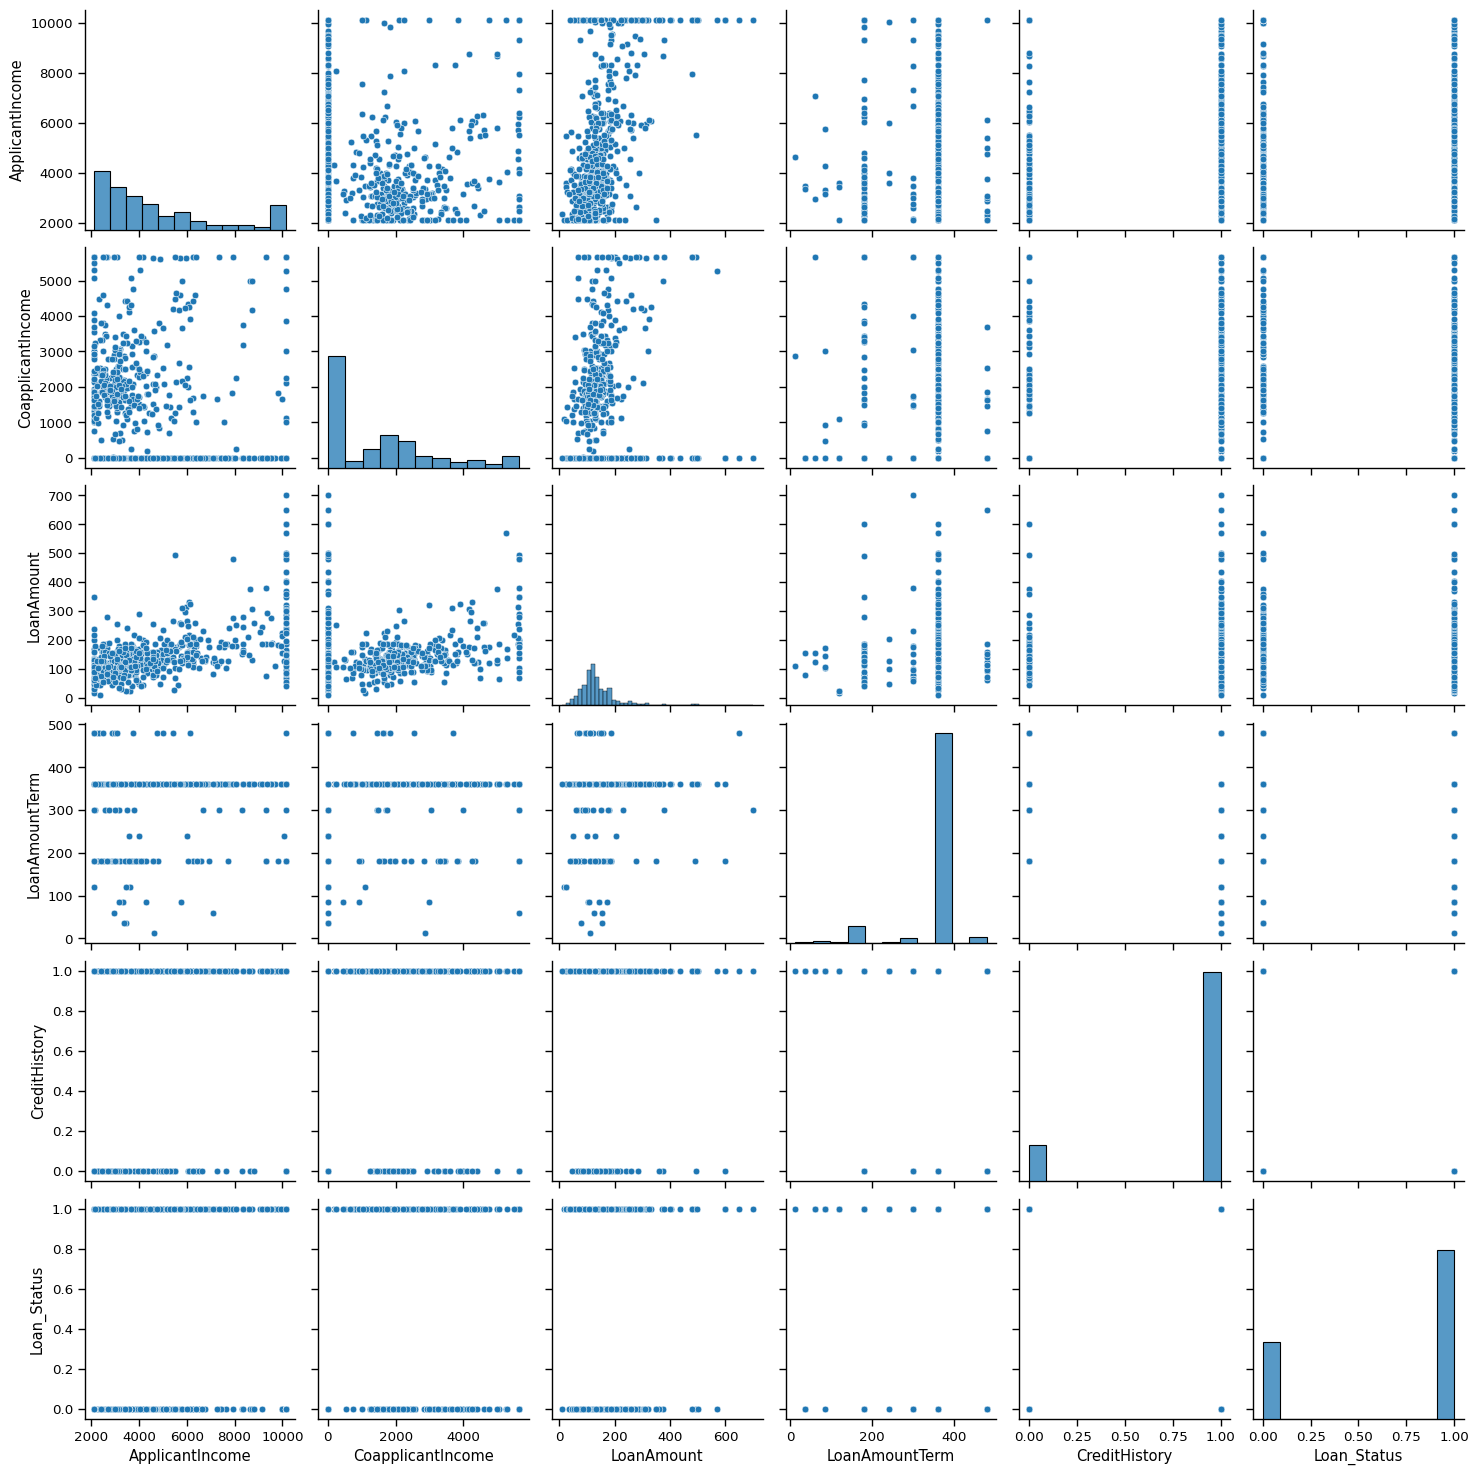

In [175]:
##############################################
display_colored_message("\nPAIR PLOT...")
# Create a pairplot
sns.pairplot(df)

# Display the pairplot
plt.show()

In [176]:
##############################################
display_colored_message("\nLABEL ENCODER...")

display_colored_message("APPLY LABEL ENCODER FOR OBJECT COLUMN TYPE...")
# Filter columns with 'object' dtype
object_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to 'object' columns
for col in object_columns:
    df[col] = le.fit_transform(df[col])

print(colored(tabulate(df.head(1), headers='keys', tablefmt='fancy_grid'), 'cyan'))

╒════╤══════════╤═══════════╤══════════════╤═════════════╤════════════════╤═══════════════════╤═════════════════════╤══════════════╤══════════════════╤═════════════════╤════════════════╤═══════════════╕
│    │   Gender │   Married │   Dependents │   Education │   SelfEmployed │   ApplicantIncome │   CoapplicantIncome │   LoanAmount │   LoanAmountTerm │   CreditHistory │   PropertyArea │   Loan_Status │
╞════╪══════════╪═══════════╪══════════════╪═════════════╪════════════════╪═══════════════════╪═════════════════════╪══════════════╪══════════════════╪═════════════════╪════════════════╪═══════════════╡
│  0 │        1 │         0 │            0 │           0 │              0 │              5849 │                   0 │          128 │              360 │               1 │              2 │             1 │
╘════╧══════════╧═══════════╧══════════════╧═════════════╧════════════════╧═══════════════════╧═════════════════════╧══════════════╧══════════════════╧═════════════════╧════════════════╧══

In [177]:
##############################################
display_colored_message("SAVE PROCESSED CSV FILE ...")

#Save the processed data to a new CSV file
df.to_csv('/content/sample_data/loan_processed.csv', index=True)

In [178]:
##############################################
display_colored_message("MODEL DATA SPLIT..")


# Dropping multiple columns in a single call
columns_to_drop = ['SelfEmployed']
#columns_to_drop = ['SelfEmployed', 'Gender', 'Education', 'Dependents', 'Married', 'PropertyArea']
df_train = df.copy()
df_train = df_train.drop(columns=columns_to_drop)

print (df_train.shape)
X = df_train

X = X.drop('Loan_Status',axis=1) #Remove label

#X = df[['Gender', 'Married', 'Dependents', 'Education',
 #                          'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
 #        'LoanAmountTerm', 'PropertyArea', 'CreditHistory']]


# Rescale and normalize the features
# Standardization (Normalization)
standard_scaler = StandardScaler()
#X_scaled = standard_scaler.fit_transform(X)

# Min-Max Scaling (Rescaling)
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
y = df_train.Loan_Status

# Data Splitting

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.2,
random_state = 42)

print(colored(tabulate(df_train.head(1), headers='keys', tablefmt='fancy_grid'), 'cyan'))

(614, 11)
╒════╤══════════╤═══════════╤══════════════╤═════════════╤═══════════════════╤═════════════════════╤══════════════╤══════════════════╤═════════════════╤════════════════╤═══════════════╕
│    │   Gender │   Married │   Dependents │   Education │   ApplicantIncome │   CoapplicantIncome │   LoanAmount │   LoanAmountTerm │   CreditHistory │   PropertyArea │   Loan_Status │
╞════╪══════════╪═══════════╪══════════════╪═════════════╪═══════════════════╪═════════════════════╪══════════════╪══════════════════╪═════════════════╪════════════════╪═══════════════╡
│  0 │        1 │         0 │            0 │           0 │              5849 │                   0 │          128 │              360 │               1 │              2 │             1 │
╘════╧══════════╧═══════════╧══════════════╧═════════════╧═══════════════════╧═════════════════════╧══════════════╧══════════════════╧═════════════════╧════════════════╧═══════════════╛



Logistic Regression Model
Train Accuracy: 0.815
Test Accuracy: 0.789

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Decision Tree Model
Train Accuracy: 1.000
Test Accuracy: 0.667

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.44      0.48        43
           1       0.72      0.79      0.75        80

    accuracy                           0.67       123
   macro avg       0.63      0.61      0.62       123
weighted avg       0.66      0.67      0.66       123


Random Forest Model
Train Accuracy: 1.000
Test Accuracy: 0.772

Classification Report:
              precision    recall  f1-score   support

           0       0.

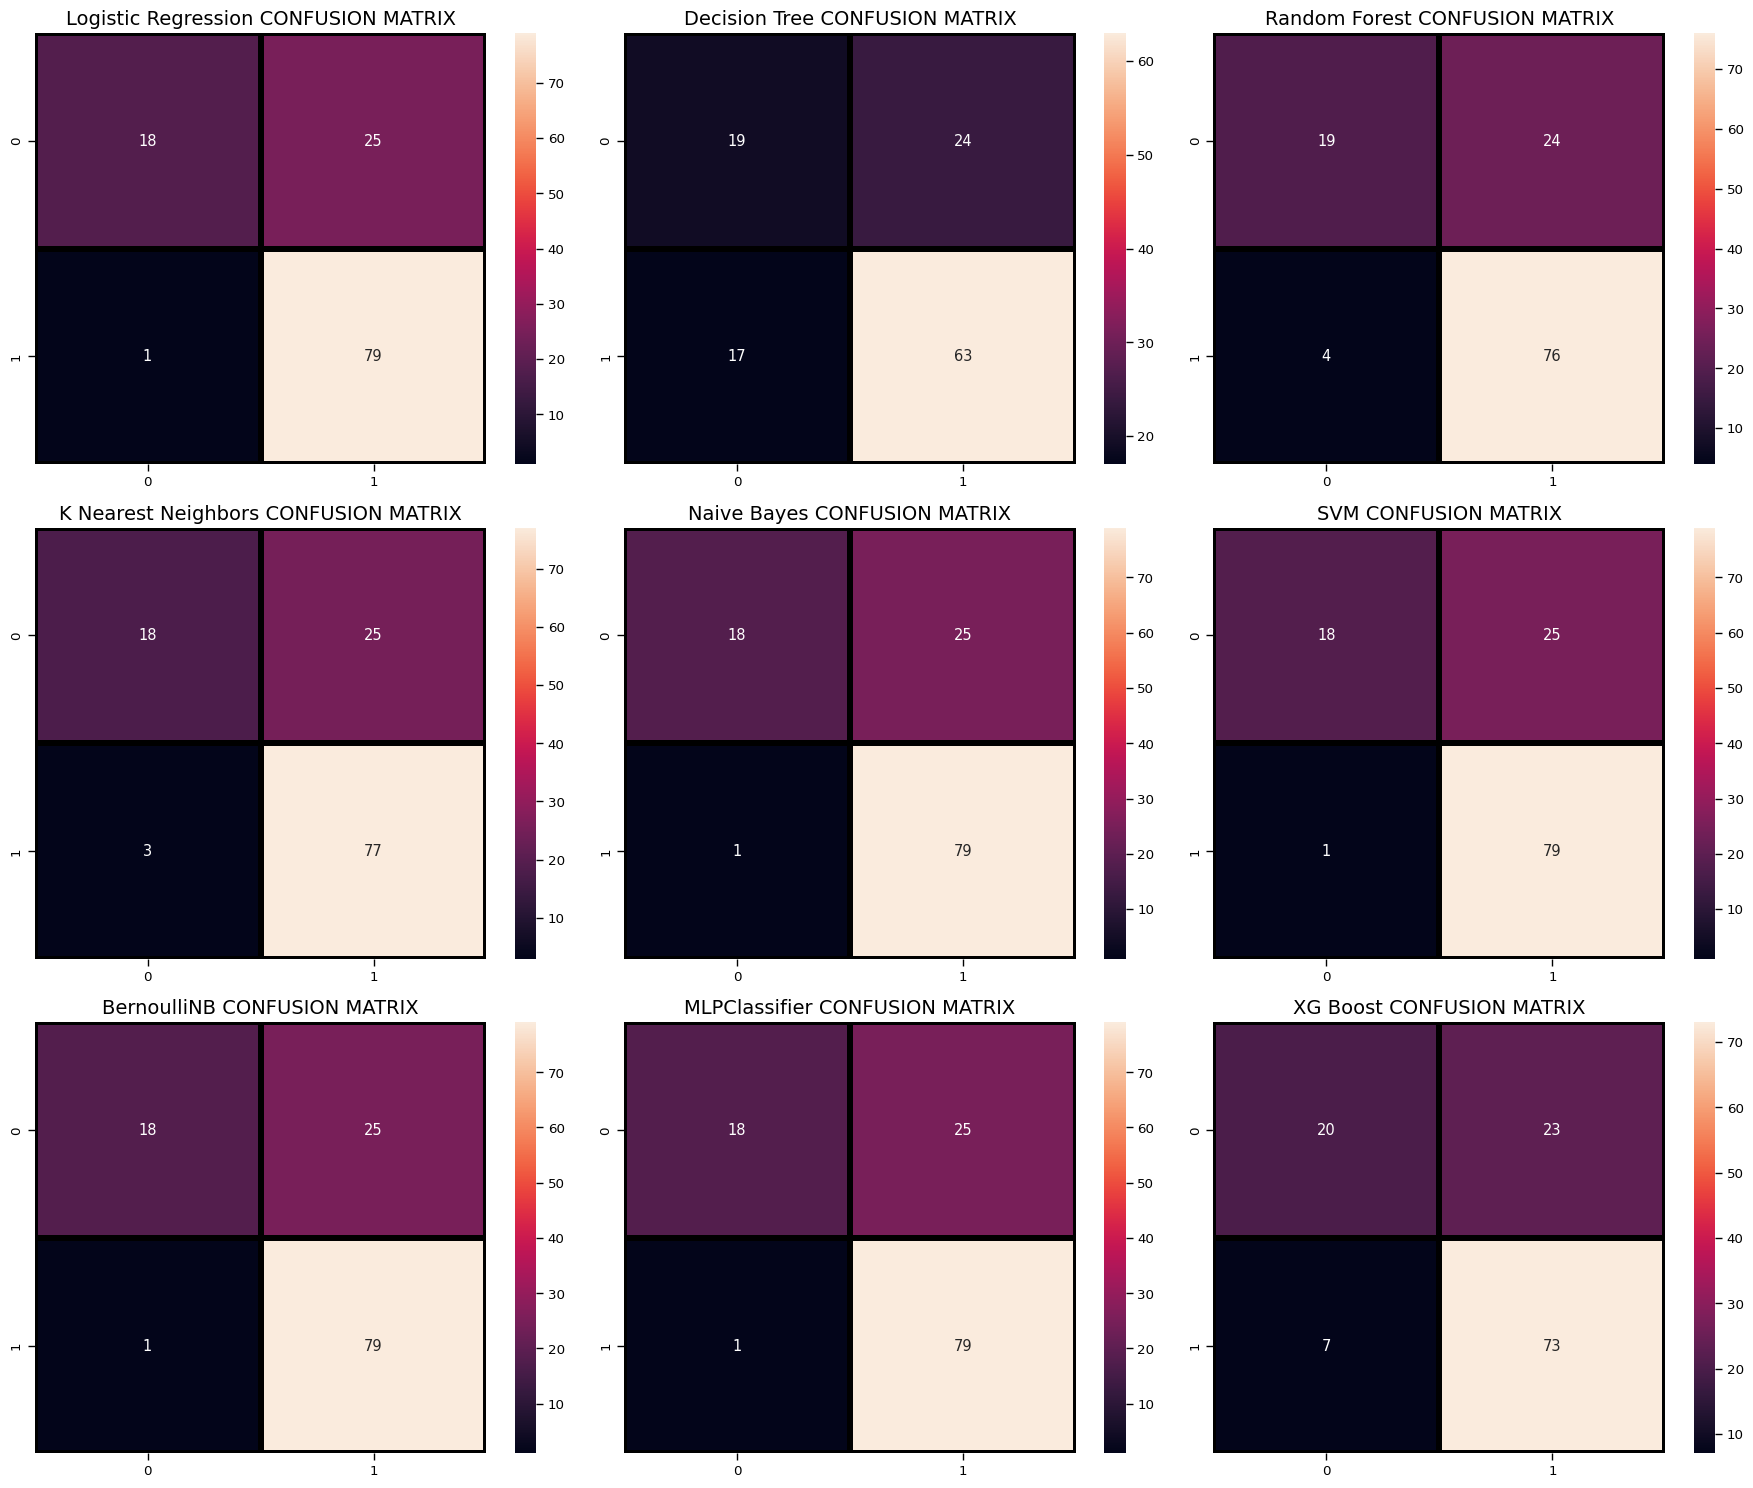

In [179]:
##############################################
display_colored_message("MODELS SCORE AND CONFUSION MATRIX...")

# List of models to train
models = [
    ("Logistic Regression", LogisticRegression(max_iter=200)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("K Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Naive Bayes", GaussianNB()),
    ("SVM", SGDClassifier(loss='log', random_state=42)),
    ("BernoulliNB", BernoulliNB()),
    ("MLPClassifier", MLPClassifier()),
    ("XG Boost", XGBClassifier())
]

# Create a DataFrame to store the evaluation metrics for each model
model_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

# Function to calculate evaluation metrics and add them to the DataFrame
def evaluate_model(model, model_name, X_test, y_test):
    # Predict labels
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Add metrics to the DataFrame
    model_metrics.loc[len(model_metrics)] = [model_name, accuracy, precision, recall, f1]

# Train and evaluate models
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

# Train each model and plot confusion matrix
for i, (name, model) in enumerate(models):
    model.fit(X_train, y_train)
    predicted_y = model.predict(X_test)

    scoreTrain = model.score(X_train, y_train)
    scoreTest = model.score(X_test, y_test)

    # Print model header with color
    print(colored(f"\n{'='*40}\n{name} Model\n{'='*40}", 'blue'))
    print(colored(f"Train Accuracy: {scoreTrain:.3f}", 'green'))
    print(colored(f"Test Accuracy: {scoreTest:.3f}\n", 'green'))


    # Print classification report with color
    print(colored("Classification Report:", 'blue'))
    report = classification_report(y_test, predicted_y)
    print(colored(report, 'yellow'))

    sns.heatmap(confusion_matrix(y_test, predicted_y), annot=True, fmt="d", linecolor="k", linewidths=3, ax=axes[i])
    axes[i].set_title(f"{name} CONFUSION MATRIX", fontsize=14)

    evaluate_model(model, name, X_test, y_test)


    # Compute learning curve
    #train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

    # Compute average train and test scores
    #avg_train_scores = np.mean(train_scores, axis=1)
    #avg_test_scores = np.mean(test_scores, axis=1)

    # Convert to lists to make them hashable
   # avg_train_scores = avg_train_scores.tolist()
    #avg_test_scores = avg_test_scores.tolist()

   # plt.figure(figsize=(10, 6))
    ##plt.plot(train_sizes, avg_train_scores, label='Training Score')
    #plt.plot(train_sizes, avg_test_scores, label='Validation Score')
    #plt.xlabel('Training Set Size')
   # plt.ylabel('Accuracy')
    #plt.title(f'Learning Curve for {name}')
    #plt.legend()
   # plt.grid(True)
   # plt.show()

plt.tight_layout()
plt.show()

display_colored_message("MODELS COMPARISON...")


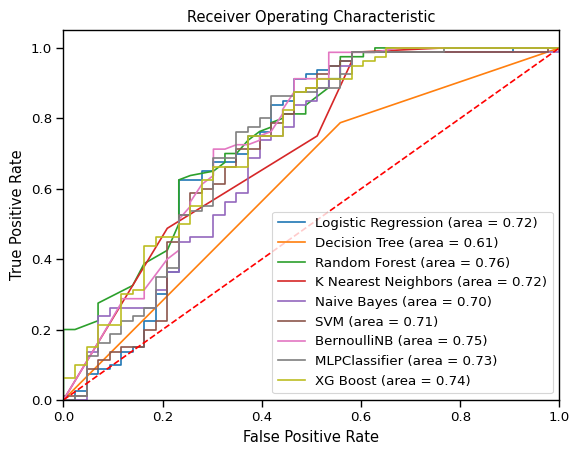

In [180]:
##############################################
display_colored_message("ROC CURVE AND AUC SCORE...")

# ROC Curve and AUC Score

# Define dictionaries to store ROC AUC scores and curves
roc_auc_scores = {}
fpr_tpr = {}

# Calculate ROC AUC scores and curves for each model
for name, model in models:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, p = roc_curve(y_test, y_pred_proba)
    roc_auc_scores[name] = roc_auc
    fpr_tpr[name] = (fpr, tpr)

# Plot ROC curves
plt.figure()
for name in roc_auc_scores:
    fpr, tpr = fpr_tpr[name]
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc_scores[name]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [181]:
##############################################
display_colored_message("MODEL METRICS...")
# Apply styles to highlight the highest metric for each model
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the style to the DataFrame
styled_model_metrics = model_metrics.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-score'])

# Save the styled DataFrame to an HTML file
styled_model_metrics_file = "model_metrics.html"
styled_model_metrics_html = styled_model_metrics.to_html()
with open(styled_model_metrics_file, "w") as f:
    f.write(styled_model_metrics_html)

print("Styled model metrics saved to:", styled_model_metrics_file)
# Display the HTML output
display(HTML(styled_model_metrics_html))


Styled model metrics saved to: model_metrics.html


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.788618,0.759615,0.987500,0.858696
1,Decision Tree,0.666667,0.724138,0.787500,0.754491
2,Random Forest,0.772358,0.760000,0.950000,0.844444
3,K Nearest Neighbors,0.772358,0.754902,0.962500,0.846154
4,Naive Bayes,0.788618,0.759615,0.987500,0.858696
5,SVM,0.788618,0.759615,0.987500,0.858696
6,BernoulliNB,0.788618,0.759615,0.987500,0.858696
7,MLPClassifier,0.788618,0.759615,0.987500,0.858696
8,XG Boost,0.756098,0.760417,0.912500,0.829545


In [182]:
##############################################
display_colored_message("EVALUATION METRICS...")

# Define the models and their corresponding evaluation metrics
models_list = [name for name, model in models]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Initialize lists to store the metrics for each model
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Populate the lists with the metrics for each model
for model_name in models_list:
    model_metrics_row = model_metrics[model_metrics['Model'] == model_name].iloc[0]
    accuracies.append(model_metrics_row['Accuracy'])
    precisions.append(model_metrics_row['Precision'])
    recalls.append(model_metrics_row['Recall'])
    f1_scores.append(model_metrics_row['F1-score'])

# Create a DataFrame from the metrics lists
metrics_df = pd.DataFrame({
    'Model': models_list,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores
})

# 3D scatter plot comparison between models
fig = px.scatter_3d(
    metrics_df,
    x='Accuracy',
    y='Precision',
    z='Recall',
    color='F1-score',  # Use F1-score for color to represent overall performance
    size='F1-score',   # Use F1-score for size to emphasize models with higher F1-scores
    size_max=18,
    symbol='Model',    # Use Model for symbols to differentiate between different models
    opacity=0.7
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# Display the plot
fig.show()


# 3D scatter plot comparison between models
fig = px.scatter_3d(
    metrics_df,
    x='Accuracy',
    y='F1-score',
    z='Precision',  # Use Precision for z-axis
    color='Model',  # Use Model for color to differentiate between different models
    size='F1-score',   # Use F1-score for size to emphasize models with higher F1-scores
    size_max=18,
    symbol='Model',    # Use Model for symbols to differentiate between different models
    opacity=0.7
)

# Update layout for better visualization
fig.update_layout(
    title='Model Performance Comparison',
    scene=dict(
        xaxis_title='Accuracy',
        yaxis_title='F1-score',
        zaxis_title='Precision'
    )
)

# Display the figure
fig.show()


In [183]:
##############################################
display_colored_message("MODEL PERFORMANCE BY METRICS...")

# Bar plot comparison between metrics for each model
fig = go.Figure()
for model_name in models_list:
    model_index = models_list.index(model_name)
    metrics_values = [accuracies[model_index], precisions[model_index], recalls[model_index], f1_scores[model_index]]
    fig.add_trace(go.Bar(
        x=metrics,
        y=metrics_values,
        name=model_name,
        marker=dict(color=px.colors.qualitative.Plotly[model_index])
    ))

fig.update_layout(
    barmode='group',
    title='Model Performance Comparison by Metric',
    xaxis_title='Metrics',
    yaxis_title='Score',
    legend_title='Model',
)
fig.show()

In [184]:
##############################################
display_colored_message("MODEL RADAR CHART COMPARAISON...")

# Radar chart comparison between metrics for each model
fig = go.Figure()
for model_name in models_list:
    model_index = models_list.index(model_name)
    fig.add_trace(go.Scatterpolar(
        r=[accuracies[model_index], precisions[model_index], recalls[model_index], f1_scores[model_index]],
        theta=metrics,
        fill='toself',
        name=model_name,
        marker=dict(color=px.colors.qualitative.Plotly[model_index]),
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='Model Performance Comparison by Metric',
    width=1200,
    height=800,
)
fig.show()


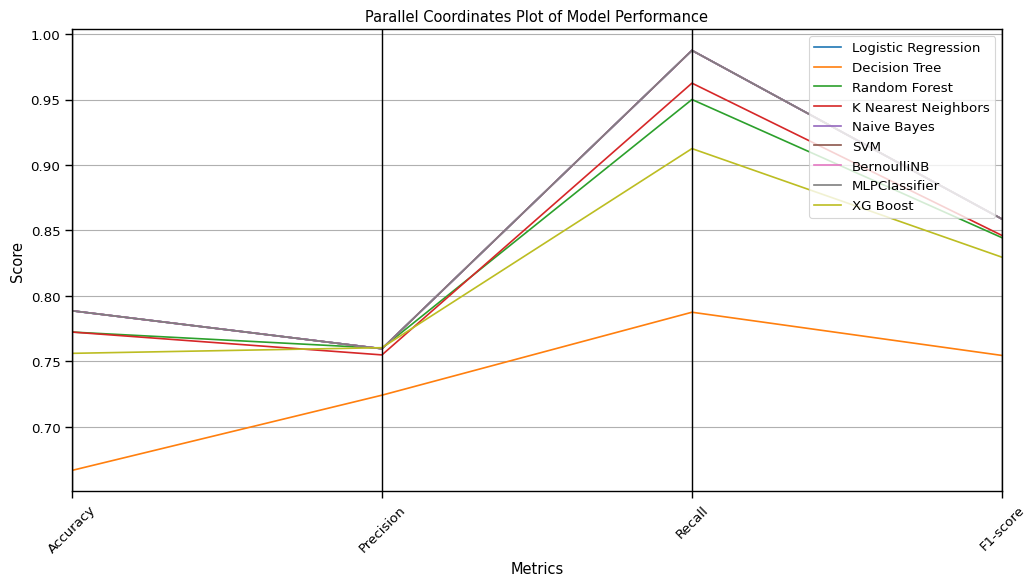

In [185]:
##############################################
display_colored_message("MODEL PERFORMANCE PARALLEL COORDINATES...")

# Parallel coordinates plot for model performance
scores = {'Model': models_list}
for metric in metrics:
    scores[metric] = [model_metrics[model_metrics['Model'] == model_name].iloc[0][metric] for model_name in models_list]

parallel_data = pd.DataFrame(scores)
colors = plt.cm.tab10(range(len(models_list)))


plt.figure(figsize=(12, 6))
parallel_coordinates(parallel_data, 'Model', colormap='viridis', color=colors)
plt.legend(loc='upper right')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.title('Parallel Coordinates Plot of Model Performance')
plt.show()


In [186]:
# Given DataFrame
teamData = pd.DataFrame({
    'Loan_ID': ['1', '2', '3'],
    'Gender': ['1', '0', '1'],
    'Married': ['1', '0', '0'],
    'Dependents': ['2', '0', '0'],
    'Education': ['1', '0', '1'],
    'SelfEmployed': ['0', '0', '0'],
    'ApplicantIncome': [4000, 10000, 3000],
    'CoapplicantIncome': [2000.0, 0.0, 2000.0],
    'LoanAmount': [100, 0.0, 66.0],
    'LoanAmountTerm': [180, 180.0, 180.0],
    'CreditHistory': [1, 1, 0],
    'PropertyArea': ['0', '1', '0'],
})

print(colored(tabulate(teamData.head(5), headers='keys', tablefmt='fancy_grid'), 'cyan'))
teamData = teamData.drop(columns=['Loan_ID'])
teamData = teamData.drop(columns=['SelfEmployed'])
#teamData = teamData.drop(columns=['ApplicantIncome'])

#df_train = df_train.drop(columns=['Loan_Status'])
#print(colored(tabulate(df_train.head(5), headers='keys', tablefmt='fancy_grid'), 'cyan'))

scaler = MinMaxScaler()
# Fit and transform the data
scaled_team_data = scaler.fit_transform(teamData)

print(scaled_team_data)

# Assuming you have trained your models list previously

# Find BernoulliNB model in the models list
bernoulli_nb_model = None
for name, model in models:
    if name == "BernoulliNB":
        bernoulli_nb_model = model
        break

# Check if BernoulliNB model is found
if bernoulli_nb_model is not None:
    # Assuming you have your data for prediction stored in X_pred
    # Make predictions using BernoulliNB model
    predictions = bernoulli_nb_model.predict(scaled_team_data)
    # Now you have predictions using BernoulliNB model
    print(predictions)
else:
    print("BernoulliNB model not found in the models list.")

╒════╤═══════════╤══════════╤═══════════╤══════════════╤═════════════╤════════════════╤═══════════════════╤═════════════════════╤══════════════╤══════════════════╤═════════════════╤════════════════╕
│    │   Loan_ID │   Gender │   Married │   Dependents │   Education │   SelfEmployed │   ApplicantIncome │   CoapplicantIncome │   LoanAmount │   LoanAmountTerm │   CreditHistory │   PropertyArea │
╞════╪═══════════╪══════════╪═══════════╪══════════════╪═════════════╪════════════════╪═══════════════════╪═════════════════════╪══════════════╪══════════════════╪═════════════════╪════════════════╡
│  0 │         1 │        1 │         1 │            2 │           1 │              0 │              4000 │                2000 │          100 │              180 │               1 │              0 │
├────┼───────────┼──────────┼───────────┼──────────────┼─────────────┼────────────────┼───────────────────┼─────────────────────┼──────────────┼──────────────────┼─────────────────┼────────────────┤
│  1 

In [1]:
####################################################
display_colored_message("MODEL IMPORTANCE FEATURES...")

#Model importance feature

#feature_labels = np.array(['Gender', 'Married', 'Dependents', 'Education', 'SelfEmployed',
#                           'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
#         'LoanAmountTerm', 'PropertyArea', 'CreditHistory'])

# Get feature labels from DataFrame columns (excluding the last column)
feature_labels = df.columns[:-1].values

# Function to display feature importance
def display_feature_importance(model, model_name, feature_labels):
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
    elif hasattr(model, "coef_"):
        importance = model.coef_[0]
    else:
        importance = []

    feature_indexes_by_importance = importance.argsort()
    print(f"\033[1m\033[34m{'='*40}\nFeature importance for {model_name}:\n{'='*40}\033[0m")
    for index in feature_indexes_by_importance:
        importance_percentage = importance[index] * 100.0
        feature_name = feature_labels[index]
        color_code = '\033[32m' if importance_percentage > 10 else '\033[33m' if importance_percentage > 5 else '\033[0m'
        print(f"{color_code}{feature_name}: {importance_percentage:.2f}%\033[0m")
    print()


# Display feature importance for applicable models
for i in range(len(models)):
    name, model_instance = models[i]
    display_feature_importance(model_instance, name, feature_labels)

NameError: name 'display_colored_message' is not defined

In [54]:
####################################################
display_colored_message("DEEP LEARNING...")

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Enhanced deep learning model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test).flatten()
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Deep Learning Model Accuracy: {accuracy * 100:.2f}%')
print(f'Deep Learning Model AUC-ROC: {roc_auc:.2f}')



Epoch 1/50
13/13 [==============================] - 2s 26ms/step - loss: 0.8940 - accuracy: 0.5459 - val_loss: 0.6687 - val_accuracy: 0.6970
Epoch 2/50
13/13 [==============================] - 0s 7ms/step - loss: 0.8677 - accuracy: 0.5816 - val_loss: 0.6446 - val_accuracy: 0.6970
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 0.7206 - accuracy: 0.6378 - val_loss: 0.6283 - val_accuracy: 0.6970
Epoch 4/50
13/13 [==============================] - 0s 7ms/step - loss: 0.7213 - accuracy: 0.6403 - val_loss: 0.6137 - val_accuracy: 0.6970
Epoch 5/50
13/13 [==============================] - 0s 7ms/step - loss: 0.6293 - accuracy: 0.7092 - val_loss: 0.6050 - val_accuracy: 0.6970
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 0.6552 - accuracy: 0.6862 - val_loss: 0.5980 - val_accuracy: 0.6970
Epoch 7/50
13/13 [==============================] - 0s 7ms/step - loss: 0.6438 - accuracy: 0.6811 - val_loss: 0.5951 - val_accuracy: 0.6970
Epoch 8/50
13/13 [=

In [53]:


from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32), activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=hp.Float('lr', 1e-4, 1e-2, sampling='log')),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='loan_approval'
)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

# Train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test, y_test)
y_pred = best_model.predict(X_test).flatten()
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Best Deep Learning Model Accuracy: {accuracy * 100:.2f}%')
print(f'Best Deep Learning Model AUC-ROC: {roc_auc:.2f}')


ModuleNotFoundError: No module named 'kerastuner'